<a href="https://colab.research.google.com/github/jona1308/Proyecto_DSII_Francone_Jonathan_Comision_61740/blob/main/Proyecto_DSII_Francone_Jonathan_Comision_61740.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Título Proyecto: "Predicción de Churn Bancario: Un Modelo para la Retención Proactiva de Clientes"


#Índice

1. Resumen General del Proyecto: Predicción de Churn Bancario
2. Visualización del Proyecto: Predicción de Churn Bancario
3. Lectura de Datos, Librerias, Modulos y Montaje de Dataset
4. Informacion General sobre los datos
5. Data Wrangling - Limpieza y transformación de datos

  /5.1- Conclusion final sobre los outliers en la Variable "age"
6. Análisis Exploratorio de Datos (EDA) "Univariado"

  /6.1- Conclusion final Análisis Univariado

7. Análisis Exploratorio de Datos (EDA)"Bivariado"

  /7.1- Conclusion Final sobre los datos arrojados en el análisis bivariado
8. Análisis Exploratorio de Datos (EDA)"Multivariado"

  /8.1-Conclusión general del Análisis Exploratorio de Datos (EDA)"Multivariado"
9. Seleccion de Caracteristicas
10. Modelos Algoritmicos

6. Conclusiones finales sobre el trabajo


#1-Resumen General del Proyecto: Predicción de Churn Bancario:


Este proyecto se centra en desarrollar un modelo de aprendizaje automático para predecir la probabilidad de churn (abandono) en clientes bancarios, un factor crucial para la rentabilidad y el éxito de cualquier institución financiera.

El objetivo principal es identificar a los clientes con mayor riesgo de churn y brindar a los bancos una herramienta para implementar estrategias de retención proactivas y personalizadas.

Mediante el análisis de datos históricos de clientes, el modelo busca identificar los factores demográficos, conductuales y transaccionales que más influyen en el churn. Con una precisión aceptable, el modelo permitirá a las instituciones financieras anticipar el churn, reducir la tasa de abandono, mejorar la satisfacción del cliente y optimizar la rentabilidad del negocio.

Este proyecto está dirigido a profesionales del sector bancario, incluyendo gerentes de relación con clientes, analistas de marketing, científicos de datos y tomadores de decisiones, que buscan optimizar sus estrategias de retención de clientes.

**"Este proyecto busca ofrecer una solución innovadora basada en datos para la retención de clientes en el sector bancario."**

#2-Visualización del Proyecto: Predicción de Churn Bancario

[Presentación Ejecutiva: Predicción de Churn Bancario](https://docs.google.com/presentation/d/1QEjx8BJByJUEKhSRjaYFuxHG_ZD1hU6vgPytoPq5Lys/edit?usp=drive_link)

#3-Lectura de Datos, Librerias, Modulos y Montaje de Dataset

##Carga de librerias, módulos y montaje de dateset desde Google Drive

*Instalar librerias*

In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn xgboost lightgbm catboost

*Importar Librerias*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import xgboost as xgb

*Modulos de Modelado*

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_predict, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.calibration import CalibratedClassifierCV, calibration_curve, FrozenEstimator
from sklearn.metrics import (
    precision_recall_curve,
    brier_score_loss,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
)











*Montar google drive*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


*Carga de Dataset*

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Proyecto_DS2_Francone_Jonathan_Comision_61740/Base_de_Datos_Churn_Bancario/Bank-Customer-Churn-Prediction.csv')

# 4-Informacion General sobre los datos

##*Vista previa de los datos*

In [ ]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


*Información sobre las columnas y tipos de datos*

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


*Estadísticas descriptivas*

In [ ]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


##Descripción de Variables

*Variable/	Descripción/	Tipo de dato*

**customer_id**/ Identificador único del cliente/	int64

**credit_score**/	Puntaje crediticio del cliente/	int64

**country**/	País de residencia del cliente/	object

**gender**/	Género del cliente/	object

**age**/	Edad del cliente/	int64

**tenure**/	Tiempo que el cliente ha sido cliente del banco/	int64

**balance**/	Saldo en la cuenta del cliente/	float64

**products_number**/	Número de productos que el cliente tiene contratados con el banco/	int64

**credit_card**/	Indicador si el cliente tiene tarjeta de crédito (1: Sí, 0: No)/	int64

**active_member**/	Indicador si el cliente es un miembro activo (1: Sí, 0: No)/	int64

**estimated_salary**/	Salario estimado del cliente/	float64

**churn**/	Indicador si el cliente ha abandonado el banco (1: Sí, 0: No) - Variable objetivo/	int64


#5-Data Wrangling - Limpieza y transformación de datos

##Valores duplicados

In [ ]:
# Verificar la cantidad de valores duplicados
print(df.duplicated().sum())

0


*Tras realizar la verificación de valores duplicados en el dataset, se ha determinado que no existen registros duplicados. Por lo tanto, no se requiere ninguna acción adicional para eliminar duplicados.*

##Valores nulos

In [ ]:
# Verificar la cantidad de valores nulos en cada columna
print(df.isnull().sum())

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64


*El análisis de valores nulos en el dataset ha revelado que no existen valores faltantes en ninguna de las columnas. Esto indica una buena calidad de los datos y evita la necesidad de aplicar técnicas de imputación o eliminación de filas con valores nulos.*

##Tratamiento de valores outliers

In [ ]:
# Lista de variables numéricas a analizar
numeric_vars = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']

# Iterar sobre cada variable numérica
for var in numeric_vars:
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identificar outliers
    outliers = df[(df[var] < lower_bound) | (df[var] > upper_bound)]

    # Verificar la cantidad de outliers
    print(f"Cantidad de outliers en '{var}': {len(outliers)}")

Cantidad de outliers en 'credit_score': 15
Cantidad de outliers en 'age': 359
Cantidad de outliers en 'tenure': 0
Cantidad de outliers en 'balance': 0
Cantidad de outliers en 'products_number': 60
Cantidad de outliers en 'estimated_salary': 0


*Se ha realizado un análisis de outliers en las variables numéricas del dataset ('credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary') utilizando el método IQR. Se han identificado una cantidad baja de outliers en las variables 'credit_score' (15) y 'products_number'(60) y una cantidad significativa en la variable 'age' (359). Se ha determinado no realizar ningun tratamiento en las variables con baja cantidad de valores atipicos y se analizara con mas profundidad la variable 'age' para decidir que tratamiento aplicar.*


##Analisis de outliers en la variable AGE para determinar el tratamiento de esos outliers

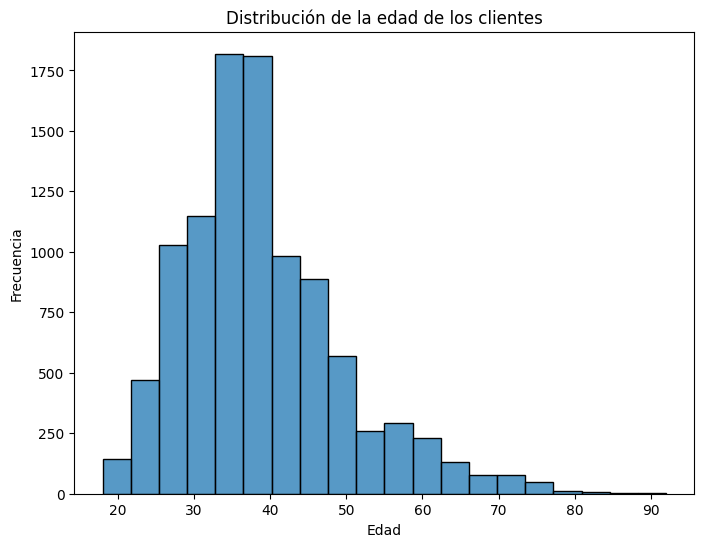

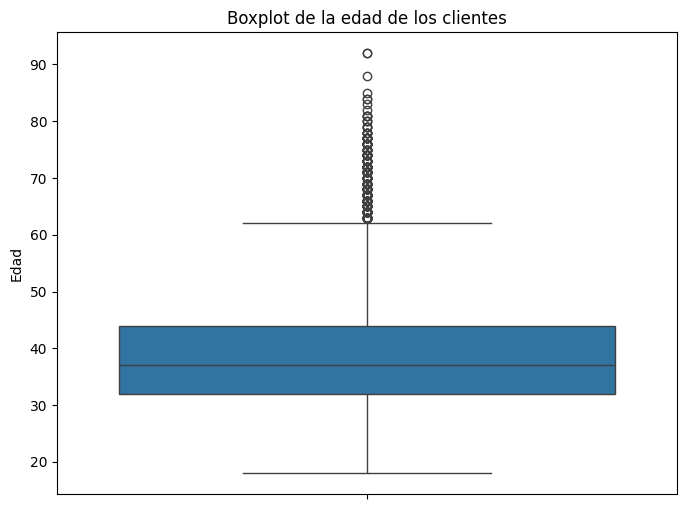

In [ ]:
# Histograma
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], bins=20)
plt.title('Distribución de la edad de los clientes')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['age'])
plt.title('Boxplot de la edad de los clientes')
plt.ylabel('Edad')
plt.show()


***Histograma y Boxplot:***

-Confirman que la mayoría de los datos se concentran en el rango de 30 a 40 años, como observaste a simple vista.

-Los outliers se ubican en edades mayores a aproximadamente 60 años.

*Estadística descriptiva*

In [ ]:
# Estadistica descriptivas
print(df['age'].describe())

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: age, dtype: float64


***Interpretación:***

-La distribución de la edad está sesgada hacia la derecha, lo que significa que hay más clientes jóvenes que clientes mayores.

-La media (38.92) es ligeramente mayor que la mediana (37), lo que indica la influencia de los valores atípicos (edades mayores).

-Los outliers en 'age' corresponden a clientes con edades significativamente mayores al promedio.

*Comparación con la variable objetivo*

age
<30      0.075203
30-40    0.120872
40-50    0.339655
50-60    0.562108
>60      0.247845
Name: churn, dtype: float64


<ipython-input-18-c122da59ebdb>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_age = df.groupby(age_groups)['churn'].mean()


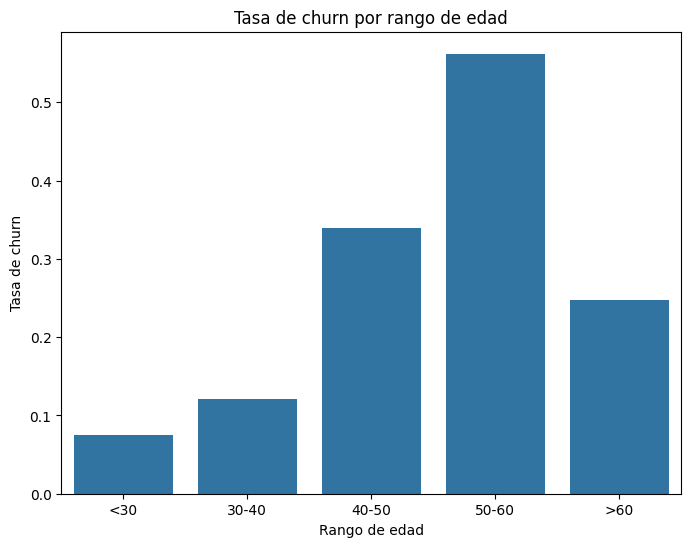

In [ ]:
# Calcular la tasa de churn para diferentes rangos de edad
age_groups = pd.cut(df['age'], bins=[0, 30, 40, 50, 60, 100], labels=['<30', '30-40', '40-50', '50-60', '>60'])
churn_by_age = df.groupby(age_groups)['churn'].mean()
print(churn_by_age)

# Visualizar la tasa de churn por rango de edad
plt.figure(figsize=(8, 6))
sns.barplot(x=churn_by_age.index, y=churn_by_age.values)
plt.title('Tasa de churn por rango de edad')
plt.xlabel('Rango de edad')
plt.ylabel('Tasa de churn')
plt.show()

***Interpretación:***

-Los clientes entre 40 y 60 años tienen una tasa de churn significativamente mayor que los clientes más jóvenes o mayores. Esto indica una clara relación entre la edad y el churn en este rango de edad.

-Los clientes menores de 30 años tienen la tasa de churn más baja.

-Los clientes mayores de 60 años tienen una tasa de churn intermedia, menor que los del grupo de 40-60, pero mayor que los menores de 30.

***En el contexto de los outliers:***

1-Los outliers en 'age' (edades mayores) sí tienen un comportamiento diferente en relación al churn, ya que la tasa de churn para el grupo >60 es mayor que para los grupos más jóvenes, aunque menor para el grupo 40-50 y 50-60.

2-Esto sugiere que los outliers en 'age' no son simplemente ruido, sino que podrían contener información valiosa para el modelo predictivo.

#5.1-***Conclusion final sobre los outliers en la Variable "age"***

*Se ha observado una relación clara entre la edad y la tasa de churn, lo que sugiere que los outliers (edades mayores) podrían contener información valiosa para el modelo. Por lo tanto, se ha decidido mantener los outliers en el dataset y no aplicar ninguna transformación a la variable. En resumen, los análisis han revelado una relación entre la edad y el churn, y los outliers en 'age' parecen ser informativos para el modelo. Por lo tanto, se mantendran en el dataset y no se aplicará ningún tratamiento específico.*

"Con esta información, se procede a la siguiente etapa del análisis, donde se explorarán en mayor detalle las relaciones entre las variables del dataset."


#6. Análisis Exploratorio de Datos (EDA) "Univariado"


##Análisis Univariado: Variables numericas

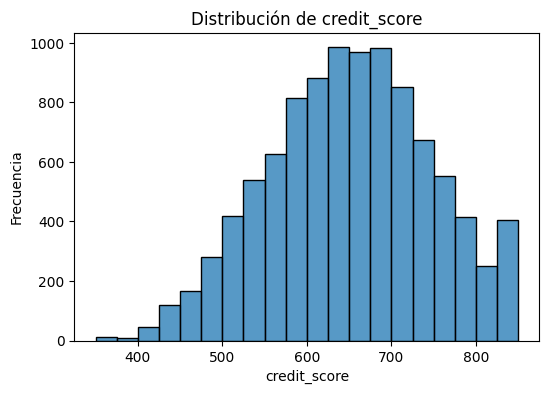

Estadísticas descriptivas de credit_score:
count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: credit_score, dtype: float64



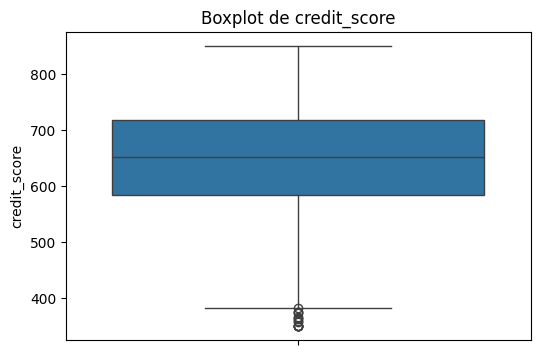

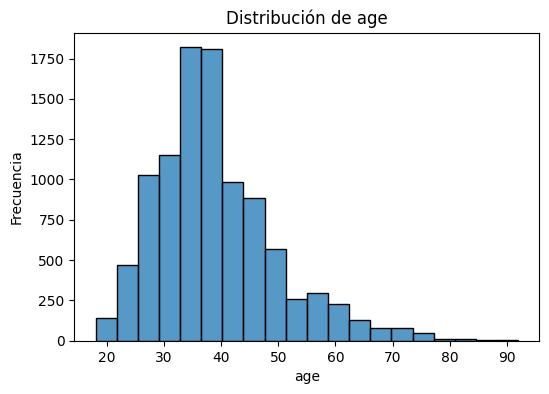

Estadísticas descriptivas de age:
count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: age, dtype: float64



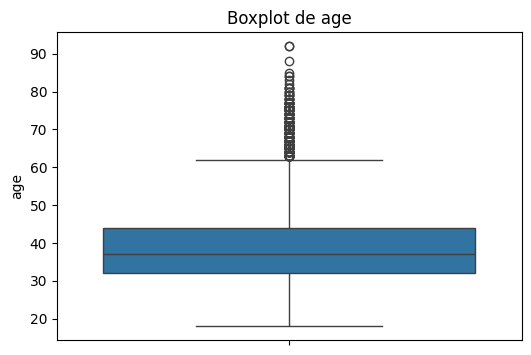

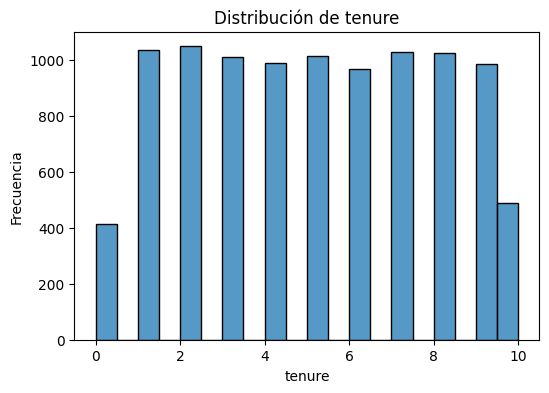

Estadísticas descriptivas de tenure:
count    10000.000000
mean         5.012800
std          2.892174
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: tenure, dtype: float64



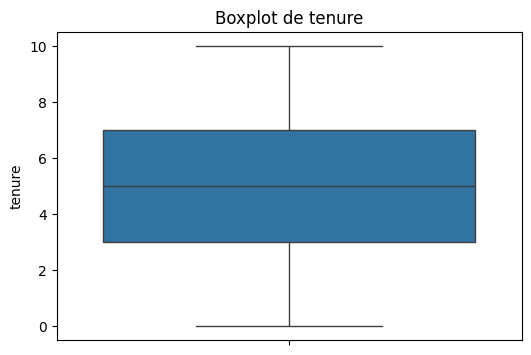

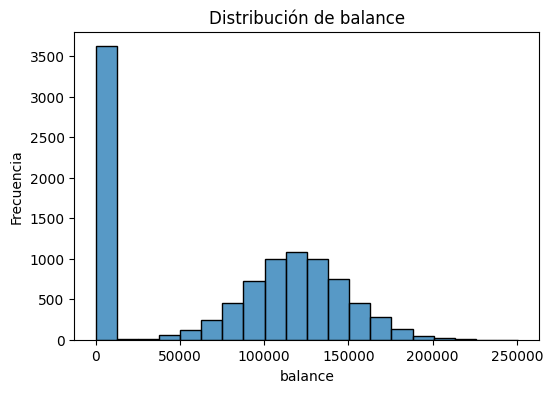

Estadísticas descriptivas de balance:
count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: balance, dtype: float64



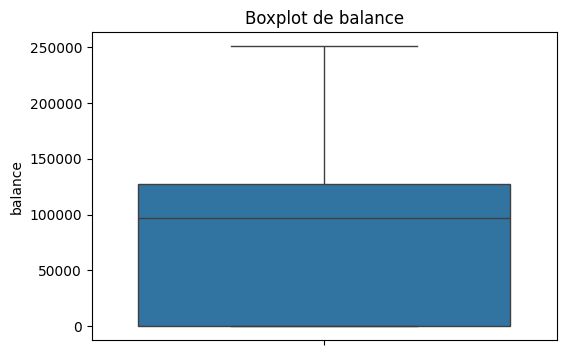

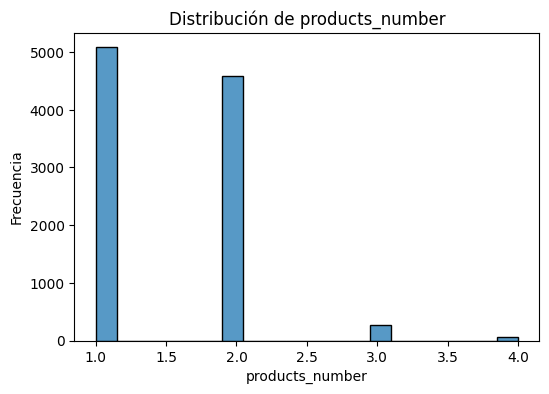

Estadísticas descriptivas de products_number:
count    10000.000000
mean         1.530200
std          0.581654
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          4.000000
Name: products_number, dtype: float64



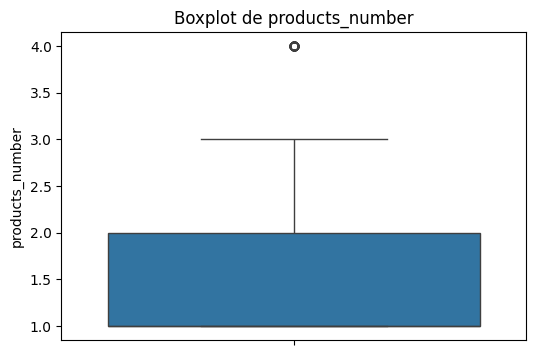

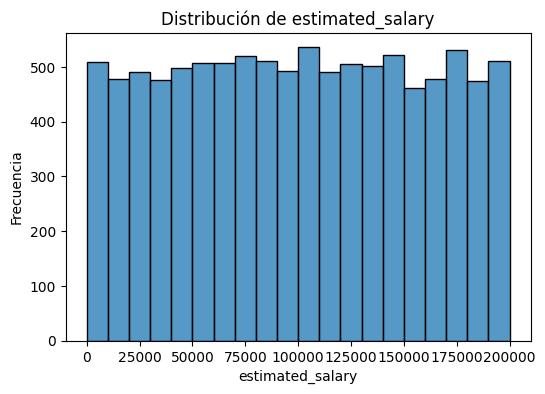

Estadísticas descriptivas de estimated_salary:
count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: estimated_salary, dtype: float64



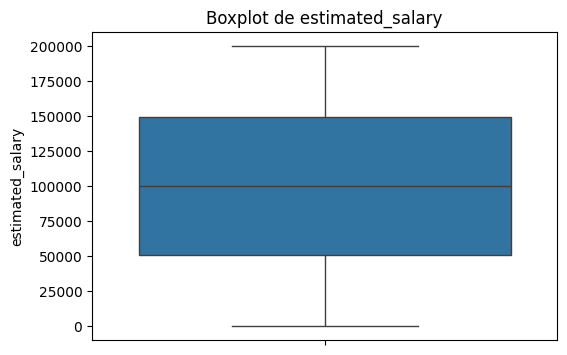

In [ ]:
# Lista de variables numéricas a analizar
numeric_vars = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']

# Iterar sobre cada variable numérica
for var in numeric_vars:
    # Histograma
    plt.figure(figsize=(6, 4))
    sns.histplot(df[var], bins=20)
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.show()

    # Estadísticas descriptivas
    print(f'Estadísticas descriptivas de {var}:\n{df[var].describe()}\n')

    # Boxplot
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[var])
    plt.title(f'Boxplot de {var}')
    plt.ylabel(var)
    plt.show()

*El análisis univariado ha proporcionado una visión general de la distribución, dispersión y rango de cada variable numérica del dataset. Se han identificado posibles outliers en las variables 'credit_score', 'age' y 'products_number', que se deben analizar con más detalle en las siguientes etapas del proyecto. Se ha tomado la decision de no aplicar tratamiento a las variables con outliers y se procedera a la siguiente etapa del proyecto.*


## Análisis Univariado: Variables categoricas


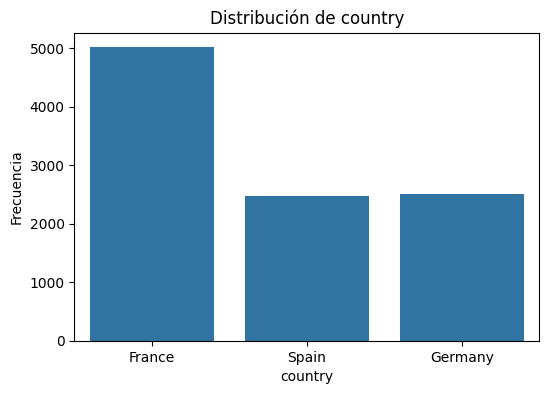

Tabla de frecuencia de country:
country
France     0.5014
Germany    0.2509
Spain      0.2477
Name: proportion, dtype: float64



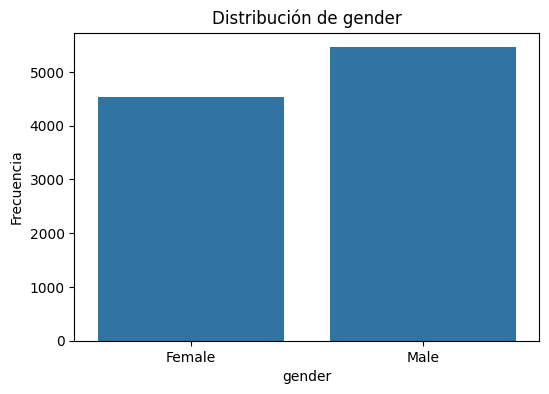

Tabla de frecuencia de gender:
gender
Male      0.5457
Female    0.4543
Name: proportion, dtype: float64



In [ ]:
# Lista de variables categóricas a analizar
categorical_vars = ['country', 'gender']

# Iterar sobre cada variable categórica
for var in categorical_vars:
    # Gráfico de barras
    plt.figure(figsize=(6, 4))  # Ajustar el tamaño del gráfico
    sns.countplot(x=var, data=df)
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.show()

    # Tabla de frecuencia
    freq_table = df[var].value_counts(normalize=True)
    print(f'Tabla de frecuencia de {var}:\n{freq_table}\n')

*Interpretación de las tablas de frecuencia:*

1. Country:

-Francia: Representa la mayor proporción de clientes, con un 50.14%.
-Alemania: Representa el 25.09% de los clientes.
-España: Representa el 24.77% de los clientes.

**Conclusión:**

*La mayoría de los clientes del banco residen en Francia, seguidos por Alemania y España en proporciones similares.*

2. Gender:

-Masculino (Male): Representa el 54.57% de los clientes.
-Femenino (Female): Representa el 45.43% de los clientes.

**Conclusión:**

*Hay una ligera mayoría de clientes masculinos en el dataset, aunque la distribución de género es relativamente equilibrada.*



#6.1- Conclusion final Análisis Univariado

*El análisis univariado ha proporcionado una visión general de la distribución, dispersión y rango de las variables numéricas del dataset, así como la distribución de las categorías en las variables categóricas. Se han identificado posibles outliers en las variables 'credit_score', 'age' y 'products_number', que se deben analizar con más detalle en las siguientes etapas del proyecto. Se ha tomado la decision de no aplicar tratamiento a las variables con outliers y se procedera a la siguiente etapa del proyecto. En el análisis de las variables categóricas, se observó que la mayoría de los clientes residen en Francia (50.14%), seguidos por Alemania (25.09%) y España (24.77%). La distribución de género es relativamente equilibrada, con un ligero predominio de clientes hombres (54.57%) en comparación con las mujeres (45.43%).*

#7. Análisis Exploratorio de Datos (EDA)"Bivariado"

##Variables Numericas

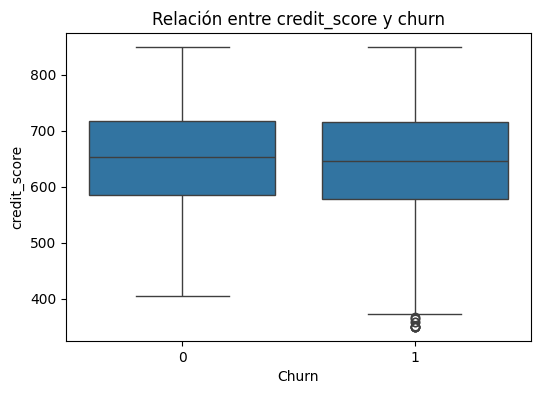

**Relación entre credit_score y churn:**




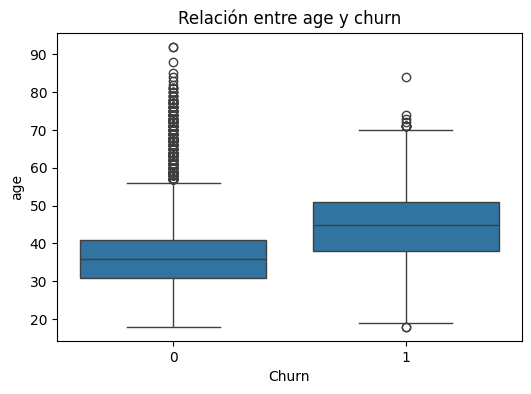

**Relación entre age y churn:**




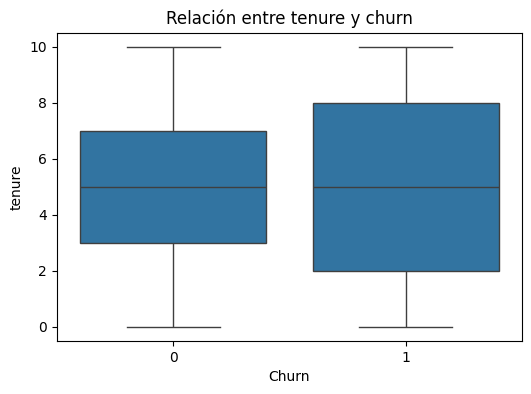

**Relación entre tenure y churn:**




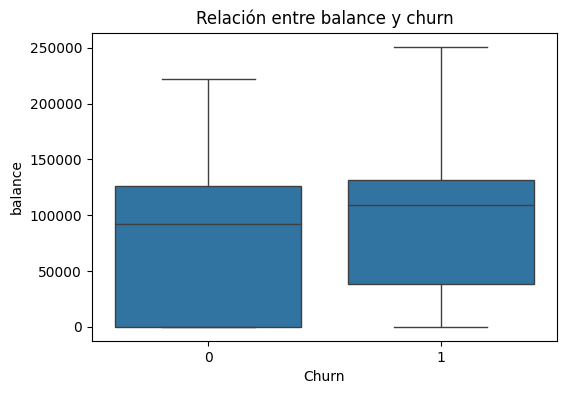

**Relación entre balance y churn:**




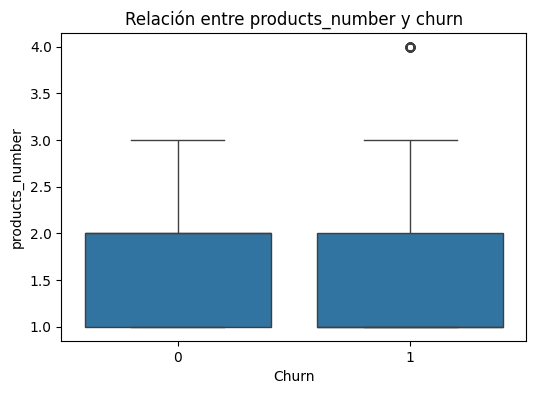

**Relación entre products_number y churn:**




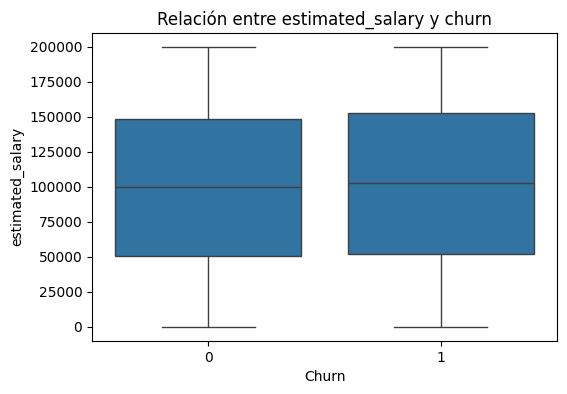

**Relación entre estimated_salary y churn:**




In [ ]:
# Lista de variables numéricas a analizar
numeric_vars = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']

# Iterar sobre cada variable numérica
for var in numeric_vars:
    # Boxplot agrupado
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='churn', y=var, data=df)
    plt.title(f'Relación entre {var} y churn')
    plt.xlabel('Churn')
    plt.ylabel(var)
    plt.show()
    # Calcular la tasa de churn para diferentes rangos de la variable numérica
    # Visualizar la tasa de churn por rango de la variable numérica

    # Respuesta descriptiva
    print(f"**Relación entre {var} y churn:**")
    # Salto de línea para separar las descripciones
    print("\n")

##Variables Categoricas

Tabla de contingencia entre country y churn:
churn       0    1
country           
France   4204  810
Germany  1695  814
Spain    2064  413



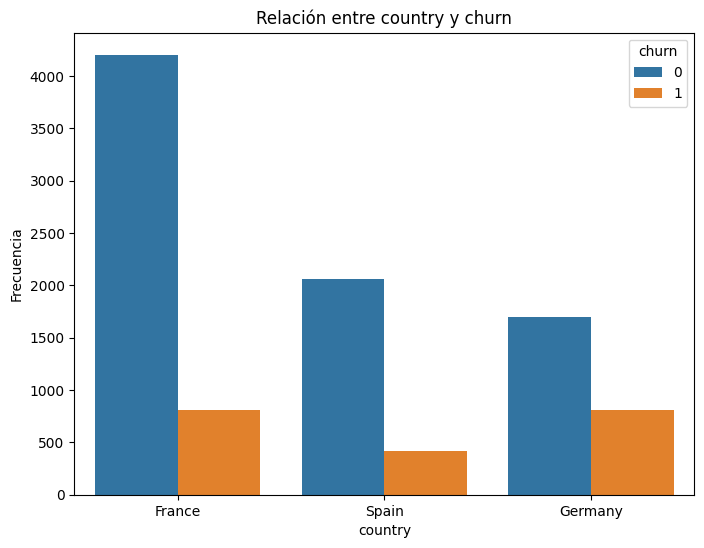

Tasa de churn por country:
country
France     0.161548
Germany    0.324432
Spain      0.166734
Name: churn, dtype: float64

Tabla de contingencia entre gender y churn:
churn      0     1
gender            
Female  3404  1139
Male    4559   898



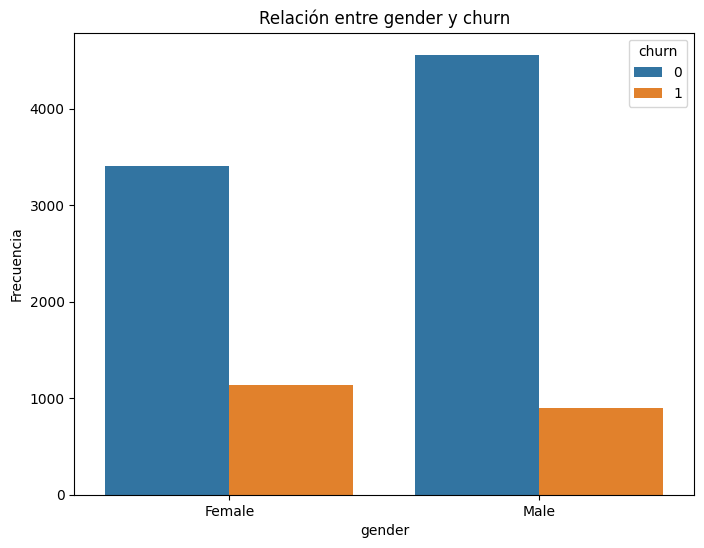

Tasa de churn por gender:
gender
Female    0.250715
Male      0.164559
Name: churn, dtype: float64



In [ ]:
# Lista de variables categóricas a analizar
categorical_vars = ['country', 'gender']

# Iterar sobre cada variable categórica
for var in categorical_vars:
    # Tabla de contingencia
    contingency_table = pd.crosstab(df[var], df['churn'])
    print(f'Tabla de contingencia entre {var} y churn:\n{contingency_table}\n')

    # Gráfico de barras agrupado
    plt.figure(figsize=(8, 6))
    sns.countplot(x=var, hue='churn', data=df)
    plt.title(f'Relación entre {var} y churn')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.show()

    # Calcular la tasa de churn por categoría
    churn_rate_by_category = df.groupby(var)['churn'].mean()
    print(f'Tasa de churn por {var}:\n{churn_rate_by_category}\n')

##Conclusiones sobre los datos arrojados en el analisís bivariado

##Relación entre credit_score y churn

**1.Diferencia en las medianas:**

La mediana de credit_score' para los clientes que abandonaron el banco (churn=1) es menor que la mediana para los clientes que no abandonaron (churn=0). Esto sugiere que los clientes con puntajes de crédito más bajos podrían tener una mayor probabilidad de abandonar el banco.

**2.Rango intercuartílico (IQR) y dispersión:**

 El hecho de que el IQR sea similar para ambos grupos indica que la dispersión de los puntajes de crédito es comparable entre los clientes que abandonan y los que no.

**3.Valores atípicos (outliers):**

La presencia de outliers en el grupo de churn=1, con puntajes de crédito muy bajos, refuerza la idea de que los puntajes de crédito bajos podrían estar relacionados con una mayor probabilidad de churn.

**4.Superposición:**

La superposición entre las cajas de ambos grupos indica que 'credit_score' por sí solo no es un predictor perfecto del churn. Hay clientes con puntajes de crédito bajos que no abandonan el banco y clientes con puntajes de crédito altos que sí lo abandonan.

**Conclusión:**

*En base a la descripción del boxplot, podemos concluir que existe una tendencia a que los clientes con puntajes de crédito más bajos tengan una mayor probabilidad de churn. Sin embargo, esta relación no es absoluta y hay otros factores que también influyen en la decisión del cliente de abandonar el banco.*

##Relación entre age y churn

**1.Diferencia en las medianas:**
  
  La mediana de 'age' para los clientes que abandonaron el banco (churn=1) es mayor que la mediana para los clientes que no abandonaron (churn=0). Esto indica que los clientes que abandonan el banco tienden a ser ligeramente mayores.

**2.Rango intercuartílico (IQR) y dispersión:**

 El IQR para el grupo de churn=1 es mayor que para el grupo de churn=0. Esto sugiere que la dispersión de edades es mayor entre los clientes que abandonan el banco.

**3.Valores atípicos (outliers):**

-En el grupo de churn=0, los outliers se encuentran principalmente en edades mayores a 60 años.

-En el grupo de churn=1, hay un outlier en edades menores a 20 años, y los demás outliers se encuentran principalmente en edades mayores a 70 años.

**4.Superposición:**

Existe cierta superposición entre las cajas de ambos grupos, pero la mediana y el IQR son diferentes, lo que indica una relación entre la edad y el churn.

**Conclusión:**

*En base a la descripción del boxplot, podemos concluir que existe una relación entre la edad y el churn. Los clientes que abandonan el banco tienden a ser ligeramente mayores y tienen una mayor dispersión de edades. Los outliers en ambos grupos sugieren que tanto los clientes muy jóvenes como los muy mayores pueden tener una mayor probabilidad de churn.*

##Relación entre tenure y churn

**1.Mediana:**

La mediana de 'tenure' para ambos grupos (churn=0 y churn=1) parece estar en el mismo lugar, entre 4 y 6. Esto sugiere que la antigüedad promedio de los clientes que abandonan el banco es similar a la de los que no abandonan.

**2.Rango intercuartílico (IQR):**

El IQR para ambos grupos es similar, lo que indica una dispersión comparable en la antigüedad de los clientes.

**3.Valores atípicos (outliers):**

No se mencionan outliers en la descripción, lo que sugiere que no hay valores atípicos significativos en 'tenure' para ninguno de los grupos.

**4.Superposición:**

Existe una gran superposición entre las cajas de ambos grupos, lo que indica que 'tenure' por sí solo no parece ser un buen predictor del churn.

**Conclusión:**

*En base a la descripción del boxplot, podemos concluir que no hay una relación clara entre la antigüedad del cliente ('tenure') y el churn. La mediana y el IQR son similares para ambos grupos, y no hay outliers significativos. Esto sugiere que la antigüedad del cliente no es un factor determinante en la decisión de abandonar el banco.*

##Relación entre balance y churn

**1.Mediana:**

La mediana de 'balance' para los clientes que abandonaron el banco (churn=1) es ligeramente mayor que la mediana para los clientes que no abandonaron (churn=0). Esto sugiere que, en promedio, los clientes que abandonan el banco tienen un balance ligeramente mayor.

**2.Rango intercuartílico (IQR) y dispersión:**

El IQR para el grupo de churn=1 es similar al del grupo de churn=0, lo que indica una dispersión comparable en los balances entre ambos grupos.

**3.Valores atípicos (outliers):**

No se mencionan outliers en la descripción, lo que sugiere que no hay valores atípicos significativos en 'balance' para ninguno de los grupos.

**4.Superposición:**

Existe una superposición considerable entre las cajas de ambos grupos, especialmente en el rango de balances entre 50,000 y 150,000. Esto indica que 'balance' por sí solo no es un predictor muy fuerte del churn. Sin embargo, la diferencia en las medianas y la forma de las cajas sugieren que podría haber una relación entre el balance y el churn.

**Conclusión:**

*En base a la descripción del boxplot, podemos concluir que existe una ligera tendencia a que los clientes con balances mayores tengan una mayor probabilidad de churn. Sin embargo, esta relación no es muy fuerte y hay una considerable superposición entre los grupos. Es posible que 'balance' interactúe con otras variables para influir en el churn.*

##Relación entre products_number y churn

**1.Mediana y Rango Intercuartílico (IQR):**

 Ambos boxplots (churn=0 y churn=1) tienen la misma mediana y el mismo IQR. Esto significa que la distribución central de 'products_number' es muy similar para los clientes que abandonan el banco y los que no.

**2.Valores atípicos (outliers):**

 No se mencionan outliers en la descripción, lo que sugiere que no hay valores atípicos significativos en 'products_number' para ninguno de los grupos (o que los outliers son muy similares en ambos grupos).

**3.Superposición:**

Los boxplots son prácticamente idénticos, lo que indica una gran superposición. Esto sugiere que 'products_number' por sí solo no es un buen predictor del churn.

**Conclusión:**

*En base a la descripción del boxplot, podemos concluir que no hay una relación clara entre el número de productos ('products_number') y el churn. La distribución de esta variable es muy similar para los clientes que abandonan el banco y los que no.*

##Relación entre estimated_salary y churn

**1.Mediana:**

 La mediana de 'estimated_salary' para los clientes que abandonaron el banco (churn=1) es muy similar a la mediana para los clientes que no abandonaron (churn=0). Esto sugiere que el salario estimado no tiene una gran influencia en la decisión de un cliente de abandonar el banco.

**2.Rango intercuartílico (IQR):**

El IQR para ambos grupos es similar, lo que indica una dispersión comparable en los salarios estimados entre los clientes que abandonan y los que no.

**3.Valores atípicos (outliers):**

No se mencionan outliers en la descripción, lo que sugiere que no hay valores atípicos significativos en 'estimated_salary' para ninguno de los grupos.

**4.Superposición:**

Los boxplots son muy similares, lo que indica una gran superposición. Esto refuerza la idea de que 'estimated_salary' por sí solo no es un buen predictor del churn.

**Conclusión:**

*En base a la descripción del boxplot, podemos concluir que no hay una relación clara entre el salario estimado ('estimated_salary') y el churn. La distribución de esta variable es muy similar para los clientes que abandonan el banco y los que no.*

##Tabla de contingencia entre country y churn/ Tasa de churn por country



**Relación entre country y churn:**

**Tabla de contingencia:**

La tabla muestra que la mayoría de los clientes que no abandonaron el banco (churn=0) residen en Francia (4204), seguidos por España (2064) y Alemania (1695). Para los clientes que abandonaron el banco (churn=1), la mayor cantidad reside en Francia (810), seguidos por Alemania (814) y España (413).

**Tasa de churn por país:**

Francia: 16.15%

Alemania: 32.44%

España: 16.67%

**Descripción:**

Los clientes de Alemania tienen una tasa de churn significativamente mayor (32.44%) en comparación con los clientes de Francia (16.15%) y España (16.67%).

*Esto indica que el país de residencia podría ser un factor relevante para predecir el churn.*

##Tabla de contingencia entre gender y churn/ Tasa de churn por gender

**Relación entre gender y churn:**

**Tabla de contingencia:**

La tabla muestra que la mayoría de los clientes que no abandonaron el banco (churn=0) son hombres (4559), seguidos por mujeres (3404). Para los clientes que abandonaron el banco (churn=1), la mayor cantidad son mujeres (1139), seguidos por hombres (898).

**Tasa de churn por género:**

Femenino (Female): 25.07%

Masculino (Male): 16.46%

**Descripción:**

Las mujeres tienen una tasa de churn ligeramente mayor (25.07%) en comparación con los hombres (16.46%).

*Esto sugiere que el género podría tener cierta influencia en la probabilidad de churn, aunque la diferencia no es tan pronunciada como en la variable 'country'.*

#7.1-Conclusion Final sobre los datos arrojados en el análisis bivariado

**Conclusión general:**

*El análisis bivariado ha permitido identificar las variables más relevantes para la predicción del churn y comprender las relaciones entre ellas. Se recomienda utilizar las variables credit_score, age, balance, country y gender como variables predictoras en el modelo, y analizar con más detalle o considerar la eliminación de las variables tenure, products_number y estimated_salary. Es importante explorar las interacciones entre las variables para obtener una comprensión más completa del churn.*

#8. Análisis Exploratorio de Datos (EDA)"Multivariado"

##Matriz de correlacion Variables numericas

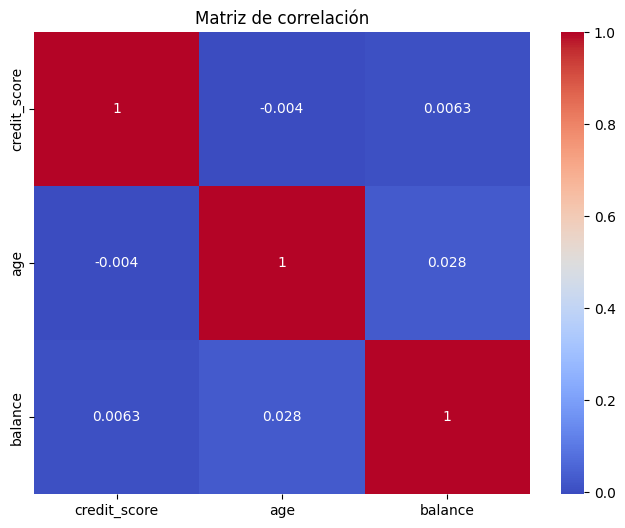

In [ ]:
# Seleccionar las variables numéricas relevantes
numeric_vars = ['credit_score', 'age', 'balance']

# Calcular la matriz de correlación
correlation_matrix = df[numeric_vars].corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

**Sobre la matriz de correlación:**

*En cuanto a la matriz de correlación, los resultados que obtuviste (balance credit score 0.0063, balance age 0.028, age credit score -0.004) indican que no hay una correlación lineal fuerte entre las variables numéricas 'balance', 'credit_score' y 'age'. Esto significa que estas variables no están fuertemente relacionadas entre sí de forma lineal.*

##Dispersion en Relación entre 'age', 'balance' y 'country'

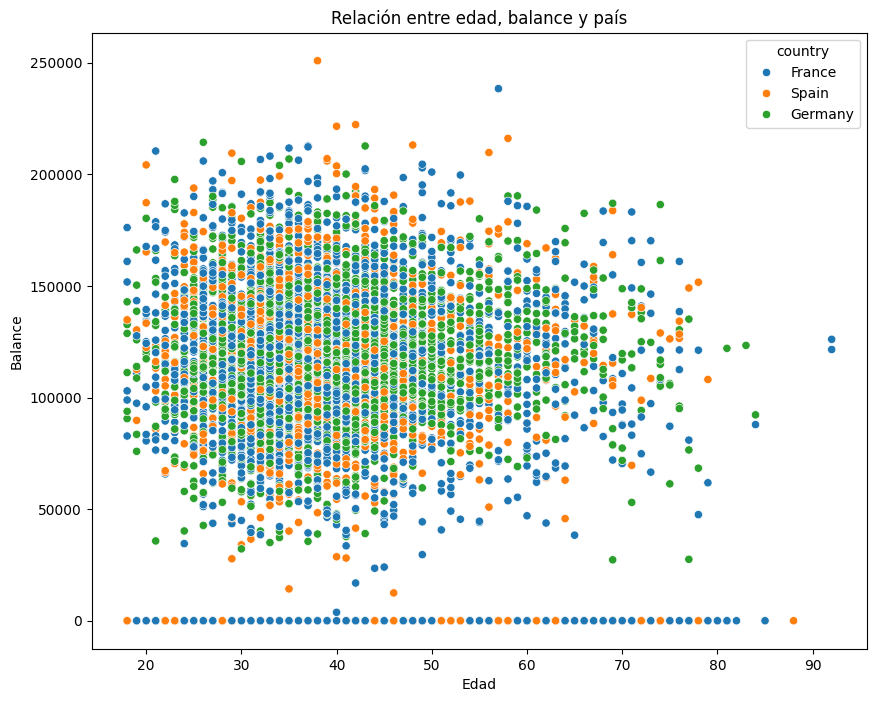

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='age', y='balance', hue='country', data=df)
plt.title('Relación entre edad, balance y país')
plt.xlabel('Edad')
plt.ylabel('Balance')
plt.show()

**Conclusiones:**

**Relación entre 'age', 'balance' y 'country':**

El gráfico de dispersión muestra que existe una relación entre estas tres variables. Se observan patrones diferentes en la distribución de 'age' y 'balance' para los diferentes países.

**Francia:**

Los clientes franceses tienen una mayor presencia en la mayoría de los rangos de 'balance', especialmente en el rango de 50,000 a 100,000. También se observa una mayor cantidad de clientes franceses con 'balance' 0 en edades avanzadas.

**Alemania:**

Los clientes alemanes se concentran principalmente en el rango de 'balance' de 100,000 a 150,000, con una distribución en el rango de edad de 20 a 60 años.

**España:**

Los clientes españoles tienen una menor presencia en el gráfico en general, pero se destaca un dato con un 'balance' de 250,000 y una edad cercana a los 40 años.

**Outliers:**

Los outliers de edad se observan principalmente en clientes franceses y alemanes con balances altos.

##Dispersion en Relación entre 'credit_score' y 'balance', codificando 'gender' con colores

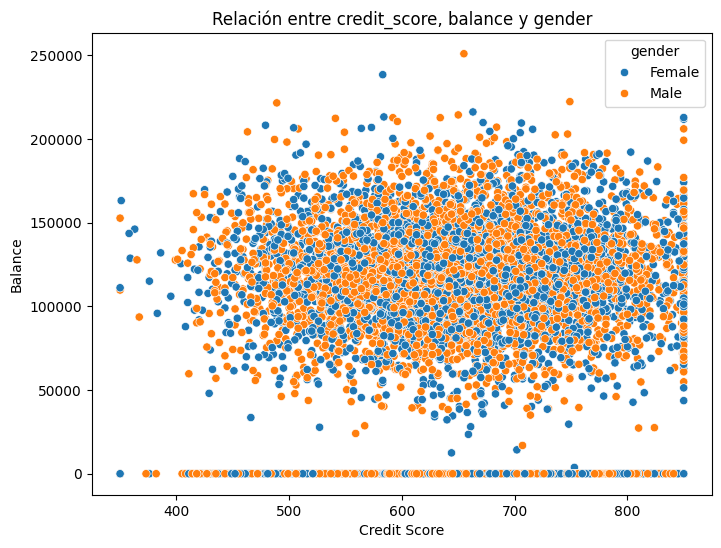

In [ ]:
# Ejemplo 1: Relación entre 'credit_score' y 'balance', codificando 'gender' con colores
plt.figure(figsize=(8, 6))
sns.scatterplot(x='credit_score', y='balance', hue='gender', data=df)
plt.title('Relación entre credit_score, balance y gender')
plt.xlabel('Credit Score')
plt.ylabel('Balance')
plt.show()

**Interpretación:**

**Relación entre 'credit_score', 'balance' y 'gender':**

El gráfico de dispersión sugiere que existe una relación entre estas tres variables. La distribución de los datos y la predominancia de hombres o mujeres varían en diferentes regiones del gráfico.

**Hombres:**

Tienden a tener una mayor presencia en la región con 'credit_score' y 'balance' intermedios, así como en la franja con 'balance' 0. También hay algunos hombres con 'credit_score' muy alto y 'balance' variable.

**Mujeres:**

Tienden a tener una mayor presencia en las regiones con balances bajos o muy altos (con algunas excepciones). También hay algunas mujeres con 'credit_score' bajo y balances entre 100k y 150k.

##Dispersion en Relación entre 'age' y 'estimated_salary', codificando 'country' con colores

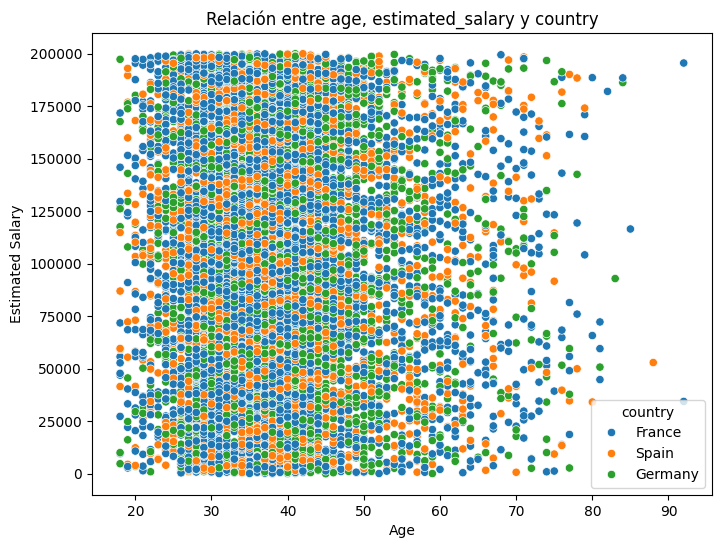

In [ ]:
# Ejemplo 2: Relación entre 'age' y 'estimated_salary', codificando 'country' con colores
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='estimated_salary', hue='country', data=df)
plt.title('Relación entre age, estimated_salary y country')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()

**Conclusiones:**

-La variable 'country' influye en la relación entre 'age' y 'estimated_salary'.
Los clientes franceses tienen una mayor presencia en la mayoría de los rangos de edad y salario estimado.

-Los clientes alemanes tienden a concentrarse en rangos de edad específicos y tienen una distribución más amplia en la banda salarial.

-Los clientes españoles tienen una menor presencia en el gráfico.

##Boxplot de Distribución de 'balance' para diferentes combinaciones de 'country' y 'gender'

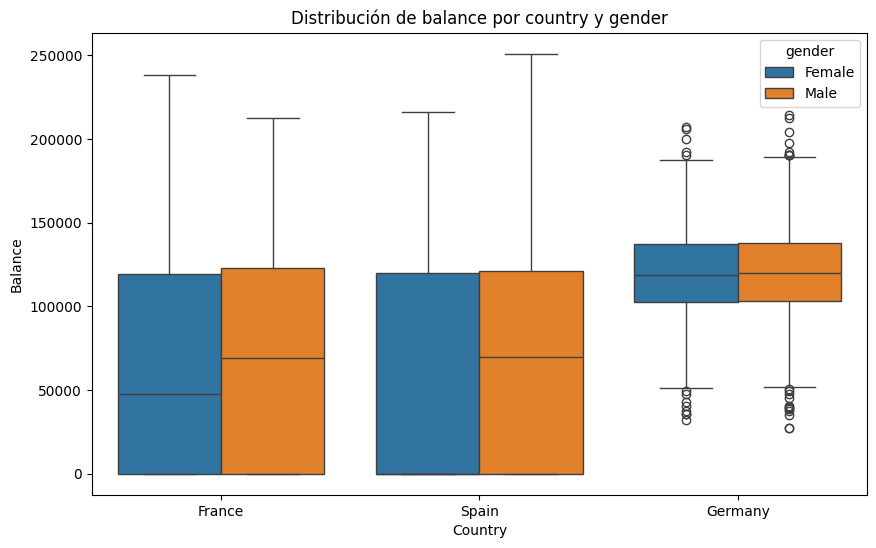

In [ ]:
# Ejemplo 1: Distribución de 'balance' para diferentes combinaciones de 'country' y 'gender'
plt.figure(figsize=(10, 6))
sns.boxplot(x='country', y='balance', hue='gender', data=df)
plt.title('Distribución de balance por country y gender')
plt.xlabel('Country')
plt.ylabel('Balance')
plt.show()

**Conclusiones:**

**-Francia:**

Las mujeres tienen una mediana de 'balance' menor que los hombres (50k vs 75k), pero una mayor dispersión en sus balances, con una proyección superior más extensa.

**-España: **

No hay mucha diferencia en la distribución de 'balance' entre hombres y mujeres, excepto por la presencia de la mediana en el boxplot masculino. Las mujeres tienen una mayor proyección superior.

**-Alemania:**

Las mujeres tienen una mediana de 'balance' ligeramente menor que los hombres, pero tienen una mayor cantidad de outliers en la parte inferior del boxplot. Los hombres tienen más outliers en la parte superior.

""Boxplot de Distribución de 'estimated_salary' para diferentes combinaciones de 'country' y 'active_member'

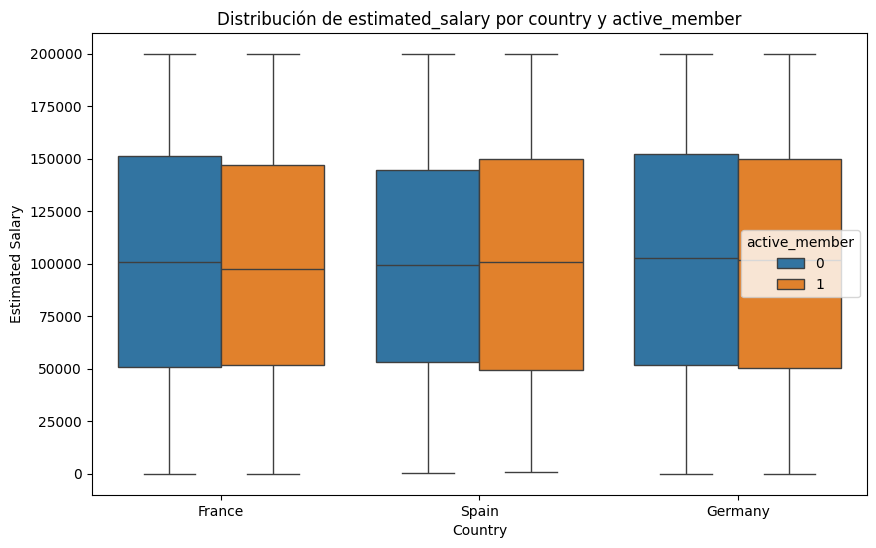

In [ ]:
# Ejemplo 2: Distribución de 'estimated_salary' para diferentes combinaciones de 'country' y 'active_member'
plt.figure(figsize=(10, 6))
sns.boxplot(x='country', y='estimated_salary', hue='active_member', data=df)
plt.title('Distribución de estimated_salary por country y active_member')
plt.xlabel('Country')
plt.ylabel('Estimated Salary')
plt.show()

**Conclusiones:**

-La distribución de 'estimated_salary' varía según el país y el género.
En Francia y Alemania, las mujeres tienen una mediana de 'estimated_salary' mayor que los hombres.

-En España, los hombres tienen una mediana de 'estimated_salary' ligeramente mayor que las mujeres.

-El rango intercuartílico de 'estimated_salary' es similar para ambos géneros en la mayoría de los casos.

##Tabla de  Frecuencia de churn para diferentes combinaciones de 'country', 'gender' y 'products_number'

In [ ]:
# Ejemplo 1: Frecuencia de churn para diferentes combinaciones de 'country', 'gender' y 'products_number'
contingency_table = pd.crosstab([df['country'], df['gender']], [df['churn'], df['products_number']])
print(f'Tabla de contingencia multidimensional:\n{contingency_table}\n')

Tabla de contingencia multidimensional:
churn               0              1            
products_number     1     2   3    1   2   3   4
country gender                                  
France  Female    805   989   7  311  82  48  19
        Male     1145  1243  15  253  53  34  10
Germany Female    351   387   7  313  75  46  14
        Male      420   527   3  265  51  40  10
Spain   Female    378   474   6  138  53  35   5
        Male      576   622   8  129  34  17   2



**Conclusiones:**

-La combinación de 'country', 'gender' y 'products_number' influye en la frecuencia de churn.

-La frecuencia de churn es mayor para las mujeres que para los hombres, en la mayoría de las combinaciones de país y número de productos.

-La frecuencia de churn es mayor para los clientes con 3 o 4 productos, en comparación con los que tienen 1 o 2 productos.

##Tabla de Frecuencia de churn para diferentes combinaciones de 'country', 'gender' y 'credit_card'

In [ ]:
# Ejemplo 2: Frecuencia de churn para diferentes combinaciones de 'country', 'gender' y 'credit_card'
contingency_table = pd.crosstab([df['country'], df['gender']], [df['churn'], df['credit_card']])
print(f'Tabla de contingencia multidimensional:\n{contingency_table}\n')

Tabla de contingencia multidimensional:
churn             0          1     
credit_card       0     1    0    1
country gender                     
France  Female  544  1257  139  321
        Male    686  1717  102  248
Germany Female  219   526  131  317
        Male    262   688  106  260
Spain   Female  244   614   74  157
        Male    377   829   61  121



**Conclusiones:**

-La combinación de 'country', 'gender' y 'credit_card' influye en la frecuencia de churn.

-La frecuencia de churn es mayor para las mujeres que para los hombres, en la mayoría de las combinaciones de país y posesión de tarjeta de crédito.

-La frecuencia de churn es mayor para los clientes con tarjeta de crédito, en comparación con los que no tienen.

#**8.1-Conclusión general del Análisis Exploratorio de Datos (EDA)"Multivariado":**


*El EDA ha proporcionado una valiosa comprensión de los datos y ha identificado las variables más relevantes para la predicción del churn. Esta información será fundamental para construir un modelo predictivo efectivo.*

¡Ahora podemos avanzar al siguiente paso: la construcción y evaluación del modelo predictivo!

##Experimento con las variables


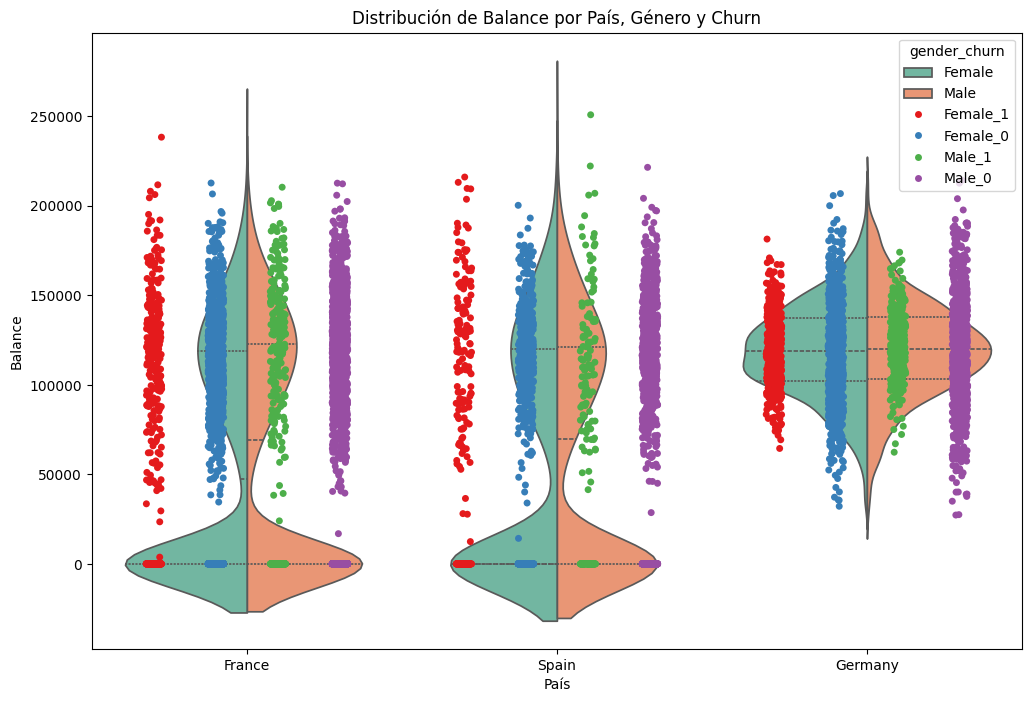

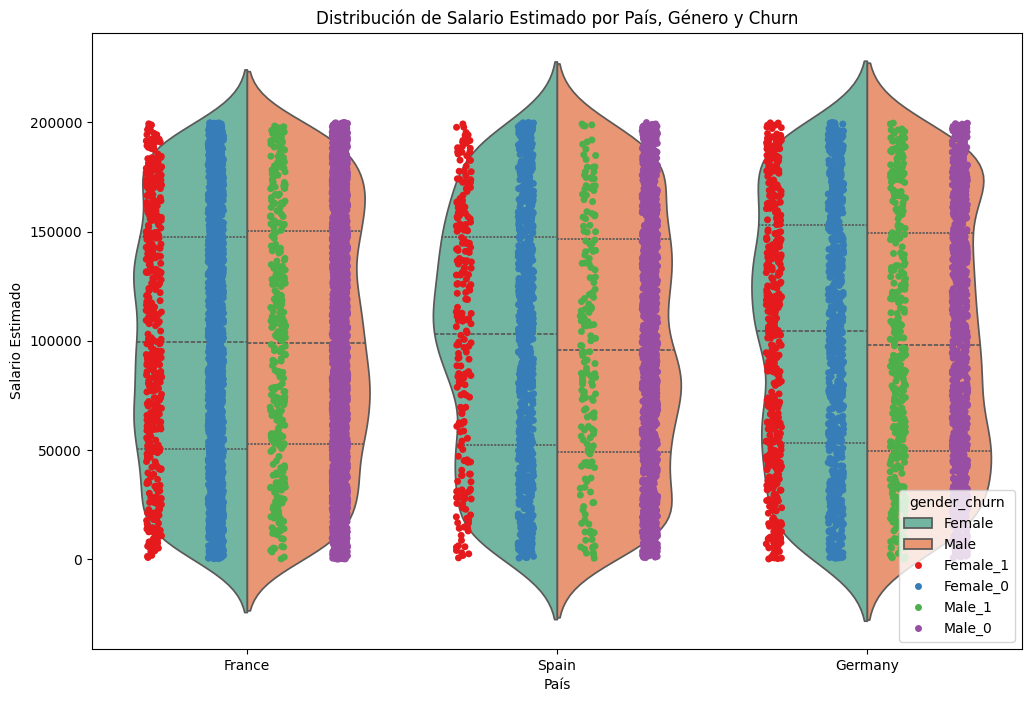

In [ ]:
# Crear una nueva columna que combine 'gender' y 'churn'
df['gender_churn'] = df['gender'] + '_' + df['churn'].astype(str)

# Crear el gráfico de violín combinado con gráfico de dispersión
plt.figure(figsize=(12, 8))
sns.violinplot(x='country', y='balance', hue='gender', data=df, split=True, inner="quart", palette="Set2")
sns.stripplot(x='country', y='balance', hue='gender_churn', data=df, jitter=True, dodge=True, palette="Set1")
plt.title('Distribución de Balance por País, Género y Churn')
plt.xlabel('País')
plt.ylabel('Balance')
plt.show()

# Crear el gráfico de violín combinado con gráfico de dispersión
plt.figure(figsize=(12, 8))
sns.violinplot(x='country', y='estimated_salary', hue='gender', data=df, split=True, inner="quart", palette="Set2")
sns.stripplot(x='country', y='estimated_salary', hue='gender_churn', data=df, jitter=True, dodge=True, palette="Set1")
plt.title('Distribución de Salario Estimado por País, Género y Churn')
plt.xlabel('País')
plt.ylabel('Salario Estimado')
plt.show()

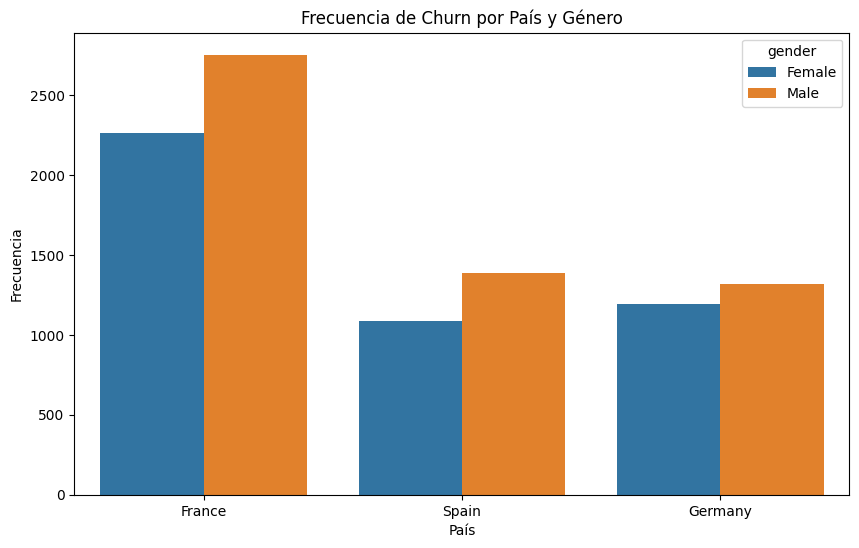

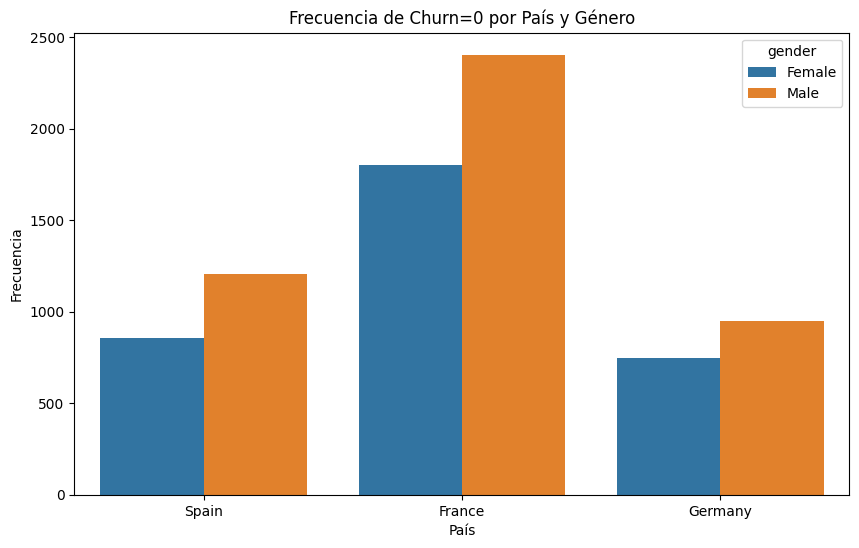

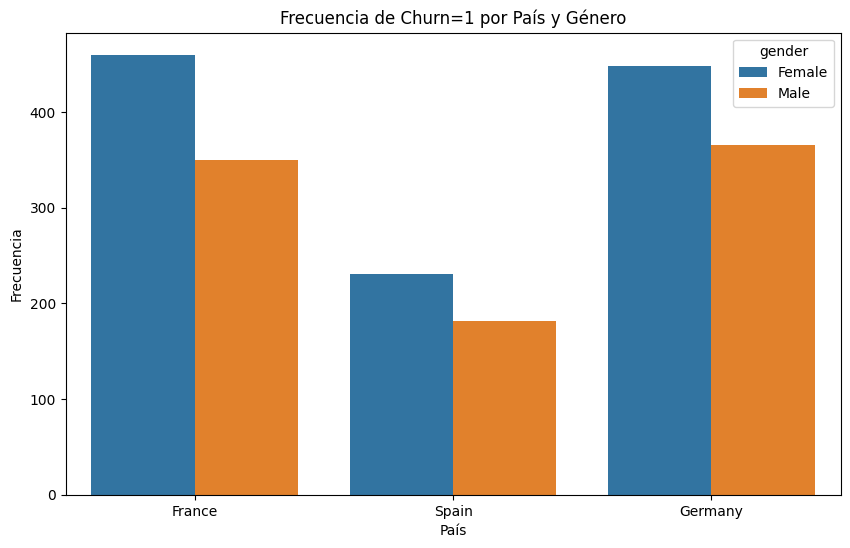

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='country', hue='gender', data=df, hue_order=['Female', 'Male'])
plt.title('Frecuencia de Churn por País y Género')
plt.xlabel('País')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='country', hue='gender', data=df[df['churn'] == 0], hue_order=['Female', 'Male'])  # Filtrar por churn=0
plt.title('Frecuencia de Churn=0 por País y Género')
plt.xlabel('País')
plt.ylabel('Frecuencia')
plt.show()


plt.figure(figsize=(10, 6))
sns.countplot(x='country', hue='gender', data=df[df['churn'] == 1], hue_order=['Female', 'Male'])  # Filtrar por churn=1
plt.title('Frecuencia de Churn=1 por País y Género')
plt.xlabel('País')
plt.ylabel('Frecuencia')
plt.show()

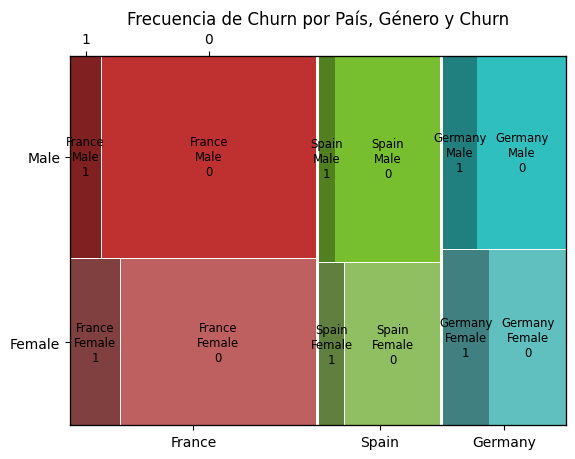

In [ ]:
mosaic(df, ['country', 'gender', 'churn'], title='Frecuencia de Churn por País, Género y Churn')
plt.show()

#9.Seleccion de Caracteristicas

##Seleccion de variables

In [ ]:
# Definir la variable objetivo
target_variable = 'churn'

# Definir las variables independientes seleccionadas
selected_features = ['credit_score', 'country', 'gender', 'age', 'balance']

**Justificación de la selección:**

**-Simplicidad:**

Hemos priorizado la simplicidad del modelo al descartar variables que no mostraron una relación clara con el churn en el análisis exploratorio.

**-Relevancia:**

Las variables seleccionadas son las que mostraron una mayor influencia en el churn en los análisis bivariados y multivariados.

**-Interpretabilidad:**

Un modelo con menos variables es más fácil de interpretar y comprender.

#10.Modelos algoritmicos

## División de datos en conjuntos de entrenamiento y prueba

Definir features y target

In [ ]:
#Lista de columnas numéricas y categóricas
numeric_features = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']
categorical_features = ['country', 'gender']

#Nombre de la variable objetivo
target = 'churn'   # o el nombre exacto en tu CSV

#Separar X e y
X = df[numeric_features + categorical_features]
y = df[target]

 Train/Test split

In [ ]:
#División estratificada 80/20
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

Pipeline de preprocesado

In [ ]:
# 4.1 ColumnTransformer para escalar y one-hot
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features),
])

Modelo base con validación cruzada

In [ ]:
# 5.1 Pipeline con XGBoost por defecto
pipe_base = Pipeline([
    ('preproc', preprocessor),
    ('clf', XGBClassifier(random_state=42, eval_metric='logloss'))
])

# 5.2 Probabilidades con StratifiedKFold CV=5
cv = StratifiedKFold(5, shuffle=True, random_state=42)
y_proba_base = cross_val_predict(
    pipe_base, X_train, y_train,
    cv=cv,
    method='predict_proba'
)[:, 1]

# 5.3 Métricas base (umbral 0.5)
y_pred_base = (y_proba_base >= 0.5).astype(int)
print("Base Accuracy:", accuracy_score(y_train, y_pred_base))
print("Base Precision:", precision_score(y_train, y_pred_base))
print("Base Recall:", recall_score(y_train, y_pred_base))
print("Base F1:", f1_score(y_train, y_pred_base))
print("Base AUC:", roc_auc_score(y_train, y_proba_base))

Base Accuracy: 0.842125
Base Precision: 0.6594265855777585
Base Recall: 0.4656441717791411
Base F1: 0.5458468176914779
Base AUC: 0.8306195163294199


Ajuste por desequilibrio (scale_pos_weight)

In [ ]:
# 6.1 Calcular peso
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
print("scale_pos_weight =", scale_pos_weight)

# 6.2 Pipeline con peso
pipe_weight = Pipeline([
    ('preproc', preprocessor),
    ('clf', XGBClassifier(
        random_state=42,
        eval_metric='logloss',
        scale_pos_weight=scale_pos_weight
    ))
])

# 6.3 Re-evaluar en CV
y_proba_w = cross_val_predict(
    pipe_weight, X_train, y_train,
    cv=cv,
    method='predict_proba'
)[:, 1]
print("AUC con peso:", roc_auc_score(y_train, y_proba_w))

scale_pos_weight = 3.9079754601226995
AUC con peso: 0.8243523610482418


Encontrar umbral óptimo

In [ ]:
# 7.1 Curva Precisión–Recall
prec, rec, thr = precision_recall_curve(y_train, y_proba_w)

# 7.2 Umbral que maximiza F1 (robusto)
valid = [(t, 2*p*r/(p+r)) for t,p,r in zip(thr, prec[:-1], rec[:-1]) if (p+r)>0]
best_thresh, best_f1 = max(valid, key=lambda x: x[1])
print(f"Umbral max-F1: {best_thresh:.3f} → F1={best_f1:.3f}")

# 7.3 (Opcional) Umbral para recall≥0.8
desired_recall = 0.8
candidates = [(t,p,r) for t,p,r in zip(thr, prec[:-1], rec[:-1]) if r>=desired_recall]
if candidates:
    t_r80, p_r80, r_r80 = max(candidates, key=lambda x: x[1])
    print(f"Umbral rec≥0.8: {t_r80:.3f} → Prec={p_r80:.3f}, Rec={r_r80:.3f}")

Umbral max-F1: 0.448 → F1=0.581
Umbral rec≥0.8: 0.193 → Prec=0.393, Rec=0.800


Búsqueda de hiperparámetros

In [ ]:
# 8.1 Espacio para RandomizedSearchCV
param_dist = {
    'clf__n_estimators':    [100,200,300,500],
    'clf__max_depth':       [3,5,7,9],
    'clf__learning_rate':   [0.01,0.05,0.1,0.2],
    'clf__subsample':       [0.6,0.8,1.0],
    'clf__colsample_bytree':[0.6,0.8,1.0],
}

# 8.2 RandomizedSearchCV sobre X_train
rand_search = RandomizedSearchCV(
    estimator=pipe_weight,
    param_distributions=param_dist,
    n_iter=20,
    scoring='roc_auc',
    cv=cv,
    n_jobs=-1,
    random_state=42,
    verbose=1
)
rand_search.fit(X_train, y_train)

print("Mejores params:", rand_search.best_params_)
print("Mejor AUC CV:", rand_search.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Mejores params: {'clf__subsample': 0.6, 'clf__n_estimators': 300, 'clf__max_depth': 5, 'clf__learning_rate': 0.01, 'clf__colsample_bytree': 1.0}
Mejor AUC CV: 0.8527588099893096


Evaluación final en test

In [ ]:
# 9.1 Pipeline final con mejores hyperparams
best = rand_search.best_estimator_

# 9.2 Ajustar sobre todo train y predecir test
best.fit(X_train, y_train)
y_proba_test = best.predict_proba(X_test)[:,1]

# 9.3 Usar umbral max-F1 encontrado antes
y_pred_test = (y_proba_test >= best_thresh).astype(int)

# 9.4 Métricas en test
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))
print("Test Precision:", precision_score(y_test, y_pred_test))
print("Test Recall:", recall_score(y_test, y_pred_test))
print("Test F1:", f1_score(y_test, y_pred_test))
print("Test AUC:", roc_auc_score(y_test, y_proba_test))

Test Accuracy: 0.7635
Test Precision: 0.45325779036827196
Test Recall: 0.7862407862407862
Test F1: 0.5750224618149147
Test AUC: 0.8515456905287414


## Pasos para construir y evaluar el modelo:

In [ ]:
# Variables numéricas y categóricas
numeric_features = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']
categorical_features = ['country', 'gender']

# Variable objetivo
target = 'churn'

# Preprocesamiento
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features),
    ])

In [ ]:
# División estratificada 80/20
X = df[numeric_features + categorical_features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Pipeline con XGBoost
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=42, eval_metric='logloss')),
])

In [ ]:
# Grilla de hiperparámetros
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 4, 5],
}

# Búsqueda por grilla con validación cruzada estratificada
grid_search = GridSearchCV(pipeline, param_grid, cv=StratifiedKFold(5), scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Mejor modelo
best_model = grid_search.best_estimator_

In [ ]:
# Predicciones en el conjunto de prueba
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva

# Métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)

# Imprimir las métricas
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"AUC: {auc}")

Accuracy: 0.852
Precision: 0.7228915662650602
Recall: 0.44226044226044225
F1-score: 0.5487804878048781
AUC: 0.8523963100234286


# **Regresionlogistica**


In [ ]:

# Definir las listas de características y la variable objetivo
numeric_features = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']
categorical_features = ['country', 'gender']
target = 'churn'  # Nombre de la variable objetivo

# Separar X (predictoras) e y (objetivo)
X = df[numeric_features + categorical_features]
y = df[target]

# Pipeline para las variables numéricas: escalado
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Pipeline para las variables categóricas: codificación OneHot
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combinamos las transformaciones usando ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Pipeline completo que incluye preprocesamiento y el clasificador
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Dividir los datos en conjuntos de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo
clf.fit(X_train, y_train)

# Evaluar modelo
score = clf.score(X_test, y_test)
print("Precisión del modelo:", score)

Precisión del modelo: 0.8035


In [ ]:

# Definir las variables numéricas y categóricas, y la variable objetivo
numeric_features = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']
categorical_features = ['country', 'gender']
target = 'churn'

# Separar X (características) e y (objetivo)
X = df[numeric_features + categorical_features]
y = df[target]

# Dividir el conjunto de datos en entrenamiento y prueba (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline de preprocesamiento para variables numéricas: se aplica escalado
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Pipeline de preprocesamiento para variables categóricas: se aplica codificación OneHot
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combinamos ambos pipelines usando ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Definir un pipeline completo que incluye preprocesamiento y el clasificador
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))  # max_iter aumenta para asegurar la convergencia
])

# Definir el espacio de hiperparámetros a evaluar
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l2'],  # actual en regresión logística con solver 'lbfgs'
    'classifier__solver': ['lbfgs']
}

# Configurar GridSearchCV para realizar la búsqueda con validación cruzada (cv=5)
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Mostrar los mejores parámetros y la precisión promedio obtenida en la validación cruzada
print("Mejores parámetros encontrados:")
print(grid_search.best_params_)
print("\nPrecisión promedio en validación cruzada:", grid_search.best_score_)

# Evaluar el modelo optimizado en el conjunto de prueba
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

Mejores parámetros encontrados:
{'classifier__C': 0.1, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}

Precisión promedio en validación cruzada: 0.7893749999999999

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1607
           1       0.48      0.12      0.20       393

    accuracy                           0.80      2000
   macro avg       0.65      0.55      0.54      2000
weighted avg       0.75      0.80      0.75      2000

Matriz de confusión:
[[1553   54]
 [ 344   49]]


In [ ]:

numeric_features = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']
categorical_features = ['country', 'gender']
target = 'churn'

# Separar las variables predictoras (X) y la variable objetivo (y)
X = df[numeric_features + categorical_features]
y = df[target]

# Dividir el conjunto en entrenamiento y prueba (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline para preprocesar las variables numéricas y categóricas
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Pipeline completo que incluye:
# 1. Preprocesamiento
# 2. Remuestreo SMOTE para balancear las clases
# 3. Clasificador de regresión logística con pesos ajustados (class_weight='balanced')
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(max_iter=1000, class_weight='balanced'))
])

# Definir el espacio de hiperparámetros a explorar en el grid search
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l2'],
    'classifier__solver': ['lbfgs']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Mejores parámetros encontrados:")
print(grid_search.best_params_)
print("\nPrecisión promedio en validación cruzada:", grid_search.best_score_)

# Evaluación del modelo optimizado en el conjunto de prueba con umbral por defecto (0.5)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("\nReporte de clasificación (umbral 0.5):")
print(classification_report(y_test, y_pred))
print("Matriz de confusión (umbral 0.5):")
print(confusion_matrix(y_test, y_pred))

# Ajuste del umbral de decisión para mejorar la detección de la clase minoritaria (churn)
y_probs = best_model.predict_proba(X_test)[:, 1]  # Probabilidades de la clase 1
threshold = 0.3  # Nuevo umbral ajustado
y_pred_adjusted = (y_probs >= threshold).astype(int)
print("\nReporte de clasificación (umbral ajustado = 0.3):")
print(classification_report(y_test, y_pred_adjusted))
print("Matriz de confusión (umbral ajustado = 0.3):")
print(confusion_matrix(y_test, y_pred_adjusted))

# Calcular la métrica AUC-ROC para tener otra perspectiva del desempeño del modelo
auc = roc_auc_score(y_test, y_probs)
print("\nAUC-ROC:", auc)

Mejores parámetros encontrados:
{'classifier__C': 0.01, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}

Precisión promedio en validación cruzada: 0.711125

Reporte de clasificación (umbral 0.5):
              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1607
           1       0.38      0.70      0.49       393

    accuracy                           0.71      2000
   macro avg       0.64      0.71      0.65      2000
weighted avg       0.80      0.71      0.74      2000

Matriz de confusión (umbral 0.5):
[[1153  454]
 [ 117  276]]

Reporte de clasificación (umbral ajustado = 0.3):
              precision    recall  f1-score   support

           0       0.96      0.30      0.46      1607
           1       0.25      0.94      0.39       393

    accuracy                           0.43      2000
   macro avg       0.60      0.62      0.43      2000
weighted avg       0.82      0.43      0.45      2000

Matriz de confusión (umbra

In [ ]:

numeric_features = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']
categorical_features = ['country', 'gender']
target = 'churn'

# Separar las variables predictoras (X) y la variable objetivo (y)
X = df[numeric_features + categorical_features]
y = df[target]

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento / 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline de preprocesamiento: escalado para variables numéricas y codificación OneHot para categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Pipeline completo que incluye preprocesamiento, balanceo con SMOTE y Regresión Logística con pesos balanceados
pipeline_lr = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(max_iter=1000, class_weight='balanced'))
])

# Definir el espacio de hiperparámetros para la búsqueda en Regresión Logística
param_grid_lr = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l2'],        # l2 es compatible con el solver 'lbfgs'
    'classifier__solver': ['lbfgs']
}

# Realizar búsqueda de hiperparámetros con validación cruzada
grid_search_lr = GridSearchCV(pipeline_lr, param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_lr.fit(X_train, y_train)

print("=== RESULTADO FINAL: REGRESIÓN LOGÍSTICA ===")
print("Mejores parámetros encontrados:")
print(grid_search_lr.best_params_)
print("Precisión promedio en validación cruzada:", grid_search_lr.best_score_)

# Evaluación del modelo en el conjunto de prueba
best_model_lr = grid_search_lr.best_estimator_
y_pred_lr = best_model_lr.predict(X_test)

print("\nReporte de clasificación (umbral 0.5):")
print(classification_report(y_test, y_pred_lr))
print("Matriz de confusión (umbral 0.5):")
print(confusion_matrix(y_test, y_pred_lr))

# Cálculo de AUC-ROC
y_probs_lr = best_model_lr.predict_proba(X_test)[:, 1]
print("AUC-ROC:", roc_auc_score(y_test, y_probs_lr))

=== RESULTADO FINAL: REGRESIÓN LOGÍSTICA ===
Mejores parámetros encontrados:
{'classifier__C': 0.01, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}
Precisión promedio en validación cruzada: 0.711125

Reporte de clasificación (umbral 0.5):
              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1607
           1       0.38      0.70      0.49       393

    accuracy                           0.71      2000
   macro avg       0.64      0.71      0.65      2000
weighted avg       0.80      0.71      0.74      2000

Matriz de confusión (umbral 0.5):
[[1153  454]
 [ 117  276]]
AUC-ROC: 0.7672713684247195


In [ ]:

numeric_features = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']
categorical_features = ['country', 'gender']
target = 'churn'

# Separar las variables predictoras (X) y la variable objetivo (y)
X = df[numeric_features + categorical_features]
y = df[target]

# División en conjuntos de entrenamiento y prueba (80% entrenamiento / 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline de preprocesamiento: escalado para numéricas y OneHotEncoder para categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Pipeline completo: Preprocesamiento, balanceo con SMOTE y Regresión Logística con class_weight='balanced'
pipeline_lr = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(max_iter=1000, class_weight='balanced'))
])

# Definir el espacio de hiperparámetros para Regresión Logística
param_grid_lr = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l2'],        # l2 es compatible con solver 'lbfgs'
    'classifier__solver': ['lbfgs']
}

# Búsqueda de hiperparámetros usando F1-score (optimizado para la clase positiva, asumiendo churn = 1)
grid_search_lr = GridSearchCV(pipeline_lr, param_grid_lr, cv=5, scoring='f1', n_jobs=-1)
grid_search_lr.fit(X_train, y_train)

print("=== RESULTADO FINAL: REGRESIÓN LOGÍSTICA (Optimización con F1) ===")
print("Mejores parámetros encontrados:")
print(grid_search_lr.best_params_)
print("F1 promedio en validación cruzada:", grid_search_lr.best_score_)

# Evaluación en el conjunto de prueba: se obtienen las probabilidades de la clase 1
best_model_lr = grid_search_lr.best_estimator_
y_probs = best_model_lr.predict_proba(X_test)[:, 1]

# Evaluar el modelo usando distintos umbrales: 0.5 (por defecto), 0.4 y 0.3.
for threshold in [0.5, 0.4, 0.3]:
    y_pred_thresh = (y_probs >= threshold).astype(int)
    print(f"\n--- Evaluación con umbral = {threshold} ---")
    print(classification_report(y_test, y_pred_thresh))
    print("Matriz de confusión:")
    print(confusion_matrix(y_test, y_pred_thresh))

# Calcular AUC-ROC en el conjunto de prueba
auc = roc_auc_score(y_test, y_probs)
print("\nAUC-ROC:", auc)

=== RESULTADO FINAL: REGRESIÓN LOGÍSTICA (Optimización con F1) ===
Mejores parámetros encontrados:
{'classifier__C': 1, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}
F1 promedio en validación cruzada: 0.4896609202920077

--- Evaluación con umbral = 0.5 ---
              precision    recall  f1-score   support

           0       0.90      0.71      0.80      1607
           1       0.37      0.69      0.48       393

    accuracy                           0.71      2000
   macro avg       0.64      0.70      0.64      2000
weighted avg       0.80      0.71      0.74      2000

Matriz de confusión:
[[1146  461]
 [ 121  272]]

--- Evaluación con umbral = 0.4 ---
              precision    recall  f1-score   support

           0       0.93      0.55      0.69      1607
           1       0.31      0.83      0.45       393

    accuracy                           0.61      2000
   macro avg       0.62      0.69      0.57      2000
weighted avg       0.81      0.61      0.65  

El umbral óptimo según el F1 score es: 0.5658224014520932 con F1: 0.5053533190578159


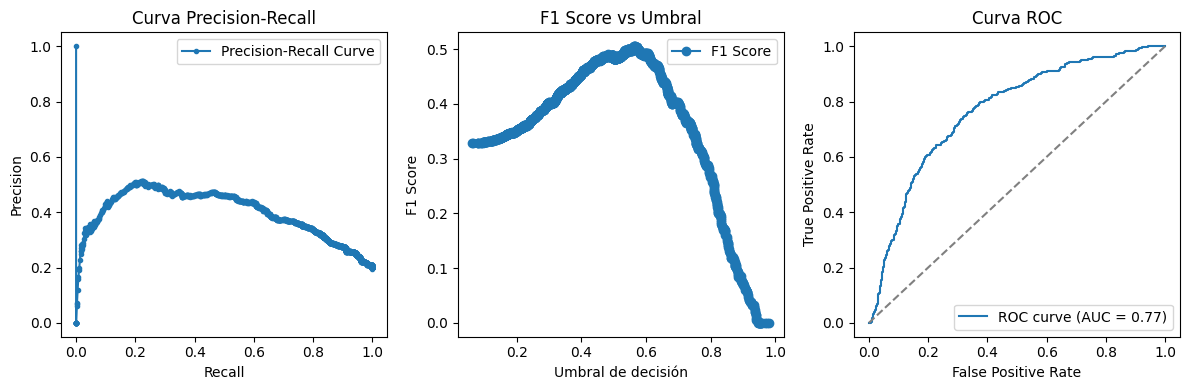


--- Evaluación con umbral óptimo = 0.57 ---
              precision    recall  f1-score   support

           0       0.89      0.81      0.85      1607
           1       0.44      0.60      0.51       393

    accuracy                           0.77      2000
   macro avg       0.66      0.71      0.68      2000
weighted avg       0.80      0.77      0.78      2000

Matriz de confusión:
[[1302  305]
 [ 157  236]]


In [ ]:

# best_model_lr, X_test, y_test
# Obtenemos nuevamente las probabilidades de la clase 1 (churn)
y_probs = best_model_lr.predict_proba(X_test)[:, 1]

# Calcular la curva Precision-Recall
precisions, recalls, thresholds_pr = precision_recall_curve(y_test, y_probs)

# Calcular el F1-score para cada umbral (thresholds_pr tiene una dimensión menor que precisions y recalls)
f1_scores = []
for threshold in thresholds_pr:
    y_pred = (y_probs >= threshold).astype(int)
    f1_scores.append(f1_score(y_test, y_pred))

# Determinar el umbral óptimo según el F1-score
max_f1 = max(f1_scores)
optimal_threshold = thresholds_pr[f1_scores.index(max_f1)]
print("El umbral óptimo según el F1 score es:", optimal_threshold, "con F1:", max_f1)

# Graficar la curva Precision-Recall
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(recalls, precisions, marker='.', label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Curva Precision-Recall")
plt.legend()

# Graficar la evolución del F1-score en función del umbral
plt.subplot(1, 3, 2)
plt.plot(thresholds_pr, f1_scores, marker='o', label="F1 Score")
plt.xlabel("Umbral de decisión")
plt.ylabel("F1 Score")
plt.title("F1 Score vs Umbral")
plt.legend()

# Graficar la curva ROC
fpr, tpr, thresholds_roc = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
plt.subplot(1, 3, 3)
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.legend()

plt.tight_layout()
plt.show()

# Evaluación final usando el umbral óptimo
y_pred_optimal = (y_probs >= optimal_threshold).astype(int)
print("\n--- Evaluación con umbral óptimo = {:.2f} ---".format(optimal_threshold))
print(classification_report(y_test, y_pred_optimal))
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_optimal))

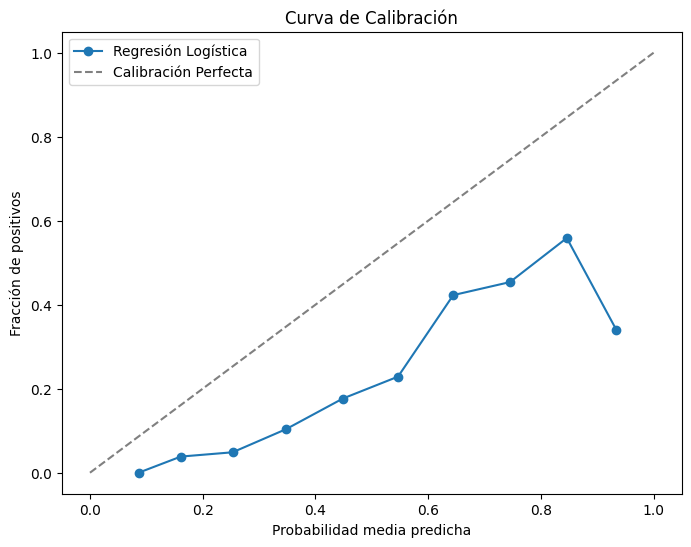

Brier Score: 0.2016552717811002

Coeficientes y Odds Ratios:
           Característica  Coeficiente  Odds Ratio
1                num__age     0.823986    2.279567
7    cat__country_Germany     0.473393    1.605432
9      cat__gender_Female     0.247891    1.281320
3            num__balance     0.146548    1.157831
5   num__estimated_salary     0.037318    1.038023
2             num__tenure    -0.025849    0.974482
4    num__products_number    -0.085294    0.918242
0       num__credit_score    -0.086143    0.917463
8      cat__country_Spain    -0.221386    0.801407
10       cat__gender_Male    -0.321176    0.725296
6     cat__country_France    -0.325292    0.722316


'\nResultados y recomendaciones:\n\n- La CURVA DE CALIBRACIÓN y el Brier Score permiten evaluar qué tan bien se ajustan las probabilidades predichas a las tasas reales.\n  - Si la curva se acerca a la diagonal (y = x), el modelo está bien calibrado.\n  - Un Brier Score más bajo indica mejores predicciones probabilísticas.\n  \n- Los COEFICIENTES y sus Odds Ratios indican la influencia de cada variable:\n  - Un Odds Ratio > 1 sugiere que al aumentar la variable, la probabilidad de churn aumenta.\n  - Un Odds Ratio < 1 sugiere que al aumentar la variable, la probabilidad de churn disminuye.\n  \n- A partir de estos análisis, podrías:\n  - Investigar si algunas variables se pueden mejorar mediante ingeniería de features (por ejemplo, interacciones o transformaciones no lineales).\n  - Tomar decisiones de negocio basadas en los factores más influyentes para diseñar estrategias de retención.\n  \n- Además, si se detecta una mala calibración, podrías aplicar técnicas de post-calibración como

In [ ]:

# 1. CURVA DE CALIBRACIÓN

# Usamos las probabilidades de la clase 1 ya obtenidas (y_probs) a partir del modelo final
# Calculamos la curva de calibración con 10 bins
prob_true, prob_pred = calibration_curve(y_test, y_probs, n_bins=10, strategy='uniform')

plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', label='Regresión Logística')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Calibración Perfecta')
plt.xlabel('Probabilidad media predicha')
plt.ylabel('Fracción de positivos')
plt.title('Curva de Calibración')
plt.legend()
plt.show()

# Calcular el Brier Score para medir el error de calibración
brier_score = brier_score_loss(y_test, y_probs)
print("Brier Score:", brier_score)


# 2. INTERPRETACIÓN DE COEFICIENTES Y ODDS RATIOS

# Extraer el transformador del preprocesamiento del pipeline
preprocessor_final = best_model_lr.named_steps['preprocessor']

# Obtener nombres de las características después de preprocesar (incluye la codificación OneHot)
feature_names = preprocessor_final.get_feature_names_out()

# Extraer los coeficientes del clasificador dentro del pipeline
coefs = best_model_lr.named_steps['classifier'].coef_[0]

# Crear un DataFrame con los nombres, coeficientes y Odds Ratios (exp(coeficiente))
coef_df = pd.DataFrame({
    'Característica': feature_names,
    'Coeficiente': coefs,
    'Odds Ratio': np.exp(coefs)
})

# Ordenar el DataFrame según los Odds Ratios para ver las variables más influyentes (de mayor a menor)
coef_df = coef_df.sort_values(by='Odds Ratio', ascending=False)
print("\nCoeficientes y Odds Ratios:")
print(coef_df)


# 3. ANÁLISIS E INTERPRETACIÓN

"""
Resultados y recomendaciones:

- La CURVA DE CALIBRACIÓN y el Brier Score permiten evaluar qué tan bien se ajustan las probabilidades predichas a las tasas reales.
  - Si la curva se acerca a la diagonal (y = x), el modelo está bien calibrado.
  - Un Brier Score más bajo indica mejores predicciones probabilísticas.

- Los COEFICIENTES y sus Odds Ratios indican la influencia de cada variable:
  - Un Odds Ratio > 1 sugiere que al aumentar la variable, la probabilidad de churn aumenta.
  - Un Odds Ratio < 1 sugiere que al aumentar la variable, la probabilidad de churn disminuye.

- A partir de estos análisis:
  - Investigar si algunas variables se pueden mejorar mediante ingeniería de features (por ejemplo, interacciones o transformaciones no lineales).
  - Tomar decisiones de negocio basadas en los factores más influyentes para diseñar estrategias de retención.

- Además, si se detecta una mala calibración, podrías aplicar técnicas de post-calibración como Platt Scaling o la calibración isotónica, para ajustar las probabilidades predichas.

Con estos pasos adicionales visión más compleja y detallada del comportamiento del modelo, lo que ayudará a ajustar estrategias de intervención para los clientes que churnean y a justificar la elección del umbral óptimo.

"""

/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(


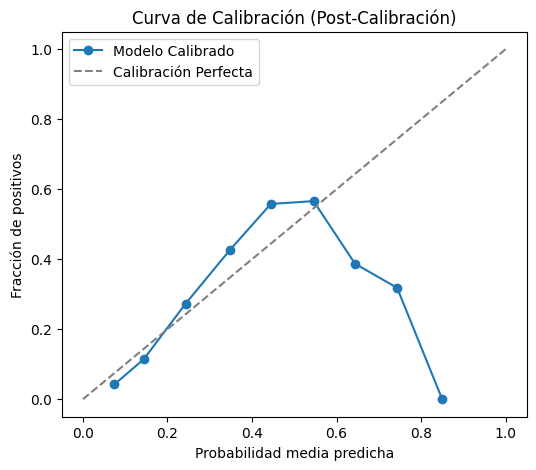


=== Evaluación Final Post-Calibración con umbral = 0.57 ===
              precision    recall  f1-score   support

           0       0.81      0.97      0.88      1607
           1       0.37      0.07      0.12       393

    accuracy                           0.79      2000
   macro avg       0.59      0.52      0.50      2000
weighted avg       0.72      0.79      0.73      2000

Matriz de confusión:
[[1561   46]
 [ 366   27]]
AUC-ROC (Calibrado): 0.7672270331295493
Brier Score (Calibrado): 0.13912579156036106


In [ ]:

# - best_model_lr: Tu pipeline final de Regresión Logística (que incluye preprocesamiento, SMOTE y el clasificador)
# - X_train, y_train, X_test, y_test: Datos de entrenamiento y prueba


# Se extrae el clasificador del pipeline.
estimator_lr = best_model_lr.named_steps['classifier']

# Inicializamos CalibratedClassifierCV usando el estimador extraído y el método 'sigmoid'.
calibrated_clf = CalibratedClassifierCV(estimator_lr, method='sigmoid', cv="prefit")

# Es necesario transformar los datos usando el preprocesador del pipeline.
X_train_trans = best_model_lr.named_steps['preprocessor'].transform(X_train)
X_test_trans = best_model_lr.named_steps['preprocessor'].transform(X_test)

# Ajustar el calibrador en el conjunto de entrenamiento.
calibrated_clf.fit(X_train_trans, y_train)

# Predecir probabilidades calibradas en el conjunto de prueba.
y_probs_cal = calibrated_clf.predict_proba(X_test_trans)[:, 1]

# Graficar la curva de calibración para el modelo calibrado.
prob_true_cal, prob_pred_cal = calibration_curve(y_test, y_probs_cal, n_bins=10, strategy='uniform')
plt.figure(figsize=(6, 5))
plt.plot(prob_pred_cal, prob_true_cal, marker='o', label='Modelo Calibrado')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Calibración Perfecta')
plt.xlabel('Probabilidad media predicha')
plt.ylabel('Fracción de positivos')
plt.title('Curva de Calibración (Post-Calibración)')
plt.legend()
plt.show()

# Evaluar el desempeño usando el mismo umbral óptimo (0.57) aplicado previamente.
optimal_threshold = 0.57
y_pred_calibrated = (y_probs_cal >= optimal_threshold).astype(int)

print("\n=== Evaluación Final Post-Calibración con umbral = {:.2f} ===".format(optimal_threshold))
print(classification_report(y_test, y_pred_calibrated))
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_calibrated))
print("AUC-ROC (Calibrado):", roc_auc_score(y_test, y_probs_cal))
print("Brier Score (Calibrado):", brier_score_loss(y_test, y_probs_cal))

In [ ]:


# Calcular la curva Precision-Recall para las probabilidades calibradas
precisions_cal, recalls_cal, thresholds_cal = precision_recall_curve(y_test, y_probs_cal)

# Calcular F1-score para cada umbral
f1_scores_cal = [f1_score(y_test, (y_probs_cal >= thr).astype(int)) for thr in thresholds_cal]

optimal_threshold_cal = thresholds_cal[f1_scores_cal.index(max(f1_scores_cal))]
max_f1_cal = max(f1_scores_cal)

print("Nuevo umbral óptimo para el modelo calibrado:", optimal_threshold_cal)
print("Nuevo F1-score óptimo:", max_f1_cal)

Nuevo umbral óptimo para el modelo calibrado: 0.2465769701618437
Nuevo F1-score óptimo: 0.5053533190578159


=== Evaluación del Modelo Sin Calibración (umbral = 0.57) ===
              precision    recall  f1-score   support

           0       0.89      0.81      0.85      1607
           1       0.44      0.59      0.50       393

    accuracy                           0.77      2000
   macro avg       0.66      0.70      0.68      2000
weighted avg       0.80      0.77      0.78      2000

Matriz de Confusión:
 [[1307  300]
 [ 160  233]]
AUC-ROC: 0.7672270331295493
Brier Score: 0.2016552717811002


/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(



Nuevo umbral óptimo para el modelo calibrado: 0.2465769701618437
Nuevo F1-score óptimo: 0.5053533190578159

=== Evaluación Final Post-Calibración con umbral = 0.25 ===
              precision    recall  f1-score   support

           0       0.89      0.81      0.85      1607
           1       0.44      0.60      0.51       393

    accuracy                           0.77      2000
   macro avg       0.66      0.71      0.68      2000
weighted avg       0.80      0.77      0.78      2000

Matriz de Confusión:
 [[1302  305]
 [ 157  236]]
AUC-ROC (Calibrado): 0.7672270331295493
Brier Score (Calibrado): 0.13912579156036106


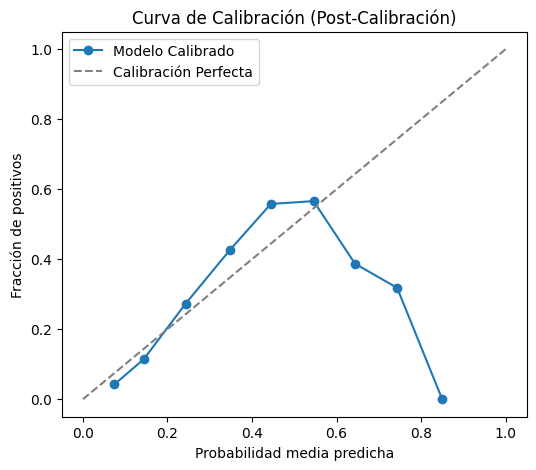


Modelos guardados para producción.


In [ ]:

# --------------------------
# 1. Preprocesamiento y definición del modelo
# --------------------------


numeric_features = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']
categorical_features = ['country', 'gender']
target = 'churn'

# Separar las variables predictoras y la variable objetivo
X = df[numeric_features + categorical_features]
y = df[target]

# División de datos: 80% entrenamiento y 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el preprocesador: escalado para variables numéricas y codificación OneHot para variables categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Crear un pipeline con preprocesamiento, balanceo mediante SMOTE y un modelo de Regresión Logística
pipeline_lr = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(max_iter=1000, class_weight='balanced'))
])

# --------------------------
# 2. Grid Search con puntaje F1 para optimizar la Regresión Logística
# --------------------------

param_grid_lr = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l2'],
    'classifier__solver': ['lbfgs']
}

grid_search_lr = GridSearchCV(pipeline_lr, param_grid_lr, cv=5, scoring='f1', n_jobs=-1)
grid_search_lr.fit(X_train, y_train)
best_model_lr = grid_search_lr.best_estimator_

# Evaluar el modelo sin calibración (usando un umbral de referencia = 0.57)
y_probs = best_model_lr.predict_proba(X_test)[:, 1]
optimal_threshold_previous = 0.57
y_pred_previous = (y_probs >= optimal_threshold_previous).astype(int)

print("=== Evaluación del Modelo Sin Calibración (umbral = 0.57) ===")
print(classification_report(y_test, y_pred_previous))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_previous))
print("AUC-ROC:", roc_auc_score(y_test, y_probs))
print("Brier Score:", brier_score_loss(y_test, y_probs))

# --------------------------
# 3. Calibración del Modelo
# --------------------------

# Extraer el clasificador del pipeline
estimator_lr = best_model_lr.named_steps['classifier']

# Configurar CalibratedClassifierCV (usando método 'sigmoid' y cv="prefit")
calibrated_clf = CalibratedClassifierCV(estimator_lr, method='sigmoid', cv="prefit")

# Transformar los conjuntos de entrenamiento y prueba con el preprocesador del pipeline
X_train_trans = best_model_lr.named_steps['preprocessor'].transform(X_train)
X_test_trans = best_model_lr.named_steps['preprocessor'].transform(X_test)

# Ajustar el calibrador en el conjunto de entrenamiento
calibrated_clf.fit(X_train_trans, y_train)

# Obtener probabilidades calibradas en el conjunto de prueba
y_probs_cal = calibrated_clf.predict_proba(X_test_trans)[:, 1]

# --------------------------
# 4. Reoptimización del Umbral para el Modelo Calibrado
# --------------------------

# Calcular la curva Precision-Recall para las probabilidades calibradas
precisions_cal, recalls_cal, thresholds_cal = precision_recall_curve(y_test, y_probs_cal)
# Calcular el F1-score para cada umbral
f1_scores_cal = [f1_score(y_test, (y_probs_cal >= thr).astype(int)) for thr in thresholds_cal]
optimal_threshold_cal = thresholds_cal[np.argmax(f1_scores_cal)]
max_f1_cal = max(f1_scores_cal)

print("\nNuevo umbral óptimo para el modelo calibrado:", optimal_threshold_cal)
print("Nuevo F1-score óptimo:", max_f1_cal)

# Evaluar el modelo calibrado usando el nuevo umbral óptimo
y_pred_calibrated = (y_probs_cal >= optimal_threshold_cal).astype(int)
print("\n=== Evaluación Final Post-Calibración con umbral = {:.2f} ===".format(optimal_threshold_cal))
print(classification_report(y_test, y_pred_calibrated))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_calibrated))
print("AUC-ROC (Calibrado):", roc_auc_score(y_test, y_probs_cal))
print("Brier Score (Calibrado):", brier_score_loss(y_test, y_probs_cal))

# Graficar la curva de calibración para el modelo calibrado
prob_true_cal, prob_pred_cal = calibration_curve(y_test, y_probs_cal, n_bins=10, strategy='uniform')
plt.figure(figsize=(6, 5))
plt.plot(prob_pred_cal, prob_true_cal, marker='o', label='Modelo Calibrado')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Calibración Perfecta')
plt.xlabel('Probabilidad media predicha')
plt.ylabel('Fracción de positivos')
plt.title('Curva de Calibración (Post-Calibración)')
plt.legend()
plt.show()

# --------------------------
# 5. Guardar el Modelo Final y el Calibrador
# --------------------------
joblib.dump(best_model_lr, "final_logistic_regression_model.pkl")
joblib.dump(calibrated_clf, "final_logistic_regression_calibrator.pkl")
print("\nModelos guardados para producción.")

=== Evaluación del Modelo Sin Calibración (umbral = 0.57) ===
              precision    recall  f1-score   support

           0       0.89      0.81      0.85      1607
           1       0.44      0.59      0.50       393

    accuracy                           0.77      2000
   macro avg       0.66      0.70      0.68      2000
weighted avg       0.80      0.77      0.78      2000

Matriz de Confusión:
 [[1307  300]
 [ 160  233]]
AUC-ROC: 0.7672270331295493
Brier Score: 0.2016552717811002


/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(



Nuevo umbral óptimo para el modelo calibrado: 0.2465769701618437
Nuevo F1-score óptimo: 0.5053533190578159

=== Evaluación Final Post-Calibración con umbral = 0.25 ===
              precision    recall  f1-score   support

           0       0.89      0.81      0.85      1607
           1       0.44      0.60      0.51       393

    accuracy                           0.77      2000
   macro avg       0.66      0.71      0.68      2000
weighted avg       0.80      0.77      0.78      2000

Matriz de Confusión:
 [[1302  305]
 [ 157  236]]
AUC-ROC (Calibrado): 0.7672270331295493
Brier Score (Calibrado): 0.13912579156036106


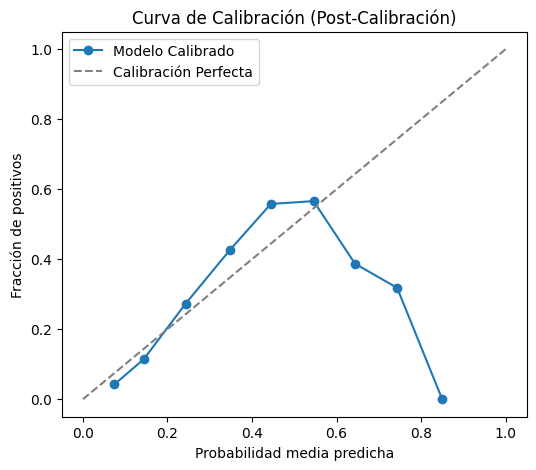


Modelos guardados para producción.


In [ ]:

# --------------------------------------
# 1. Preparación de datos y Pipeline
# --------------------------------------

numeric_features = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']
categorical_features = ['country', 'gender']
target = 'churn'

# Se separan las variables predictoras (X) y la variable objetivo (y)
X = df[numeric_features + categorical_features]
y = df[target]

# Dividir en 80% entrenamiento y 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocesador: escalado para variables numéricas y codificación OneHot para categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Pipeline: Preprocesamiento, SMOTE y Regresión Logística con pesos balanceados
pipeline_lr = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(max_iter=1000, class_weight='balanced'))
])

# --------------------------------------
# 2. Optimización de hiperparámetros con GridSearchCV (scoring F1)
# --------------------------------------
param_grid_lr = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l2'],
    'classifier__solver': ['lbfgs']
}

grid_search_lr = GridSearchCV(pipeline_lr, param_grid_lr, cv=5, scoring='f1', n_jobs=-1)
grid_search_lr.fit(X_train, y_train)
best_model_lr = grid_search_lr.best_estimator_

# --------------------------------------
# 3. Evaluación del Modelo Sin Calibración (umbral = 0.57)
# --------------------------------------
y_probs = best_model_lr.predict_proba(X_test)[:, 1]
optimal_threshold_previous = 0.57
y_pred_previous = (y_probs >= optimal_threshold_previous).astype(int)

print("=== Evaluación del Modelo Sin Calibración (umbral = 0.57) ===")
print(classification_report(y_test, y_pred_previous))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_previous))
print("AUC-ROC:", roc_auc_score(y_test, y_probs))
print("Brier Score:", brier_score_loss(y_test, y_probs))

# --------------------------------------
# 4. Calibración del Modelo
# --------------------------------------
# Extraer el clasificador del pipeline
estimator_lr = best_model_lr.named_steps['classifier']

# Nota: El argumento 'cv="prefit"' está deprecado; en versiones recientes se recomienda envolver el estimador
calibrated_clf = CalibratedClassifierCV(estimator_lr, method='sigmoid', cv="prefit")

# Transformar los datos con el preprocesador del pipeline
X_train_trans = best_model_lr.named_steps['preprocessor'].transform(X_train)
X_test_trans = best_model_lr.named_steps['preprocessor'].transform(X_test)

# Ajustar el calibrador en los datos de entrenamiento
calibrated_clf.fit(X_train_trans, y_train)

# Obtener las probabilidades calibradas para el conjunto de prueba
y_probs_cal = calibrated_clf.predict_proba(X_test_trans)[:, 1]

# --------------------------------------
# 5. Reoptimización del Umbral para el Modelo Calibrado
# --------------------------------------
precisions_cal, recalls_cal, thresholds_cal = precision_recall_curve(y_test, y_probs_cal)
f1_scores_cal = [f1_score(y_test, (y_probs_cal >= thr).astype(int)) for thr in thresholds_cal]
optimal_threshold_cal = thresholds_cal[np.argmax(f1_scores_cal)]
max_f1_cal = max(f1_scores_cal)

print("\nNuevo umbral óptimo para el modelo calibrado:", optimal_threshold_cal)
print("Nuevo F1-score óptimo:", max_f1_cal)

# Evaluar el modelo calibrado usando el nuevo umbral óptimo (aproximadamente 0.2466, redondeado a 0.25)
y_pred_calibrated = (y_probs_cal >= optimal_threshold_cal).astype(int)
print("\n=== Evaluación Final Post-Calibración con umbral = {:.2f} ===".format(optimal_threshold_cal))
print(classification_report(y_test, y_pred_calibrated))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_calibrated))
print("AUC-ROC (Calibrado):", roc_auc_score(y_test, y_probs_cal))
print("Brier Score (Calibrado):", brier_score_loss(y_test, y_probs_cal))

# Graficar la curva de calibración del modelo calibrado
prob_true_cal, prob_pred_cal = calibration_curve(y_test, y_probs_cal, n_bins=10, strategy='uniform')
plt.figure(figsize=(6, 5))
plt.plot(prob_pred_cal, prob_true_cal, marker='o', label='Modelo Calibrado')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Calibración Perfecta')
plt.xlabel('Probabilidad media predicha')
plt.ylabel('Fracción de positivos')
plt.title('Curva de Calibración (Post-Calibración)')
plt.legend()
plt.show()

# --------------------------------------
# 6. Guardar el Modelo Final y el Calibrador para producción
# --------------------------------------
joblib.dump(best_model_lr, "final_logistic_regression_model.pkl")
joblib.dump(calibrated_clf, "final_logistic_regression_calibrator.pkl")
print("\nModelos guardados para producción.")

=== Evaluación del Modelo Sin Calibración (umbral = 0.57) ===
              precision    recall  f1-score   support

           0       0.89      0.81      0.85      1607
           1       0.44      0.59      0.50       393

    accuracy                           0.77      2000
   macro avg       0.66      0.70      0.68      2000
weighted avg       0.80      0.77      0.78      2000

Matriz de Confusión:
 [[1307  300]
 [ 160  233]]
AUC-ROC: 0.7672270331295493
Brier Score: 0.2016552717811002

Nuevo umbral óptimo para el modelo calibrado: 0.2465769701618437
Nuevo F1-score óptimo: 0.5053533190578159

=== Evaluación Final Post-Calibración con umbral = 0.25 ===
              precision    recall  f1-score   support

           0       0.89      0.81      0.85      1607
           1       0.44      0.60      0.51       393

    accuracy                           0.77      2000
   macro avg       0.66      0.71      0.68      2000
weighted avg       0.80      0.77      0.78      2000

Matriz

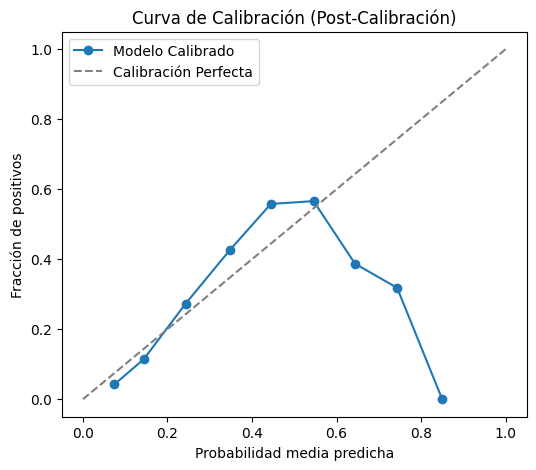


Modelos guardados para producción.


In [ ]:

##############################
# 1. Preparación de datos y Pipeline
##############################

numeric_features = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']
categorical_features = ['country', 'gender']
target = 'churn'

# Separar variables predictoras (X) y variable objetivo (y)
X = df[numeric_features + categorical_features]
y = df[target]

# Dividir el conjunto en 80% entrenamiento y 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocesador: StandardScaler para numéricas y OneHotEncoder para categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Definir el pipeline: preprocesamiento, SMOTE y el clasificador (LogisticRegression)
pipeline_lr = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(max_iter=1000, class_weight='balanced'))
])

##############################
# 2. Optimización con GridSearchCV (scoring = F1)
##############################
param_grid_lr = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l2'],
    'classifier__solver': ['lbfgs']
}

grid_search_lr = GridSearchCV(pipeline_lr, param_grid_lr, cv=5, scoring='f1', n_jobs=-1)
grid_search_lr.fit(X_train, y_train)
best_model_lr = grid_search_lr.best_estimator_

##############################
# 3. Evaluación del Modelo Sin Calibración (umbral = 0.57)
##############################
y_probs = best_model_lr.predict_proba(X_test)[:, 1]
optimal_threshold_previous = 0.57
y_pred_previous = (y_probs >= optimal_threshold_previous).astype(int)

print("=== Evaluación del Modelo Sin Calibración (umbral = 0.57) ===")
print(classification_report(y_test, y_pred_previous))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_previous))
print("AUC-ROC:", roc_auc_score(y_test, y_probs))
print("Brier Score:", brier_score_loss(y_test, y_probs))

##############################
# 4. Calibración del Modelo
##############################
# Extraer el clasificador entrenado del pipeline
estimator_lr = best_model_lr.named_steps['classifier']

# Utilizar FrozenEstimator para envolver el clasificador y evitar el warning de 'cv="prefit"'
calibrated_clf = CalibratedClassifierCV(FrozenEstimator(estimator_lr), method='sigmoid')
# Transformar X_train y X_test usando el preprocesador del pipeline
X_train_trans = best_model_lr.named_steps['preprocessor'].transform(X_train)
X_test_trans = best_model_lr.named_steps['preprocessor'].transform(X_test)

# Ajustar el calibrador en los datos de entrenamiento
calibrated_clf.fit(X_train_trans, y_train)
# Obtener las probabilidades calibradas en el conjunto de prueba
y_probs_cal = calibrated_clf.predict_proba(X_test_trans)[:, 1]

##############################
# 5. Reoptimización del Umbral para el Modelo Calibrado
##############################
precisions_cal, recalls_cal, thresholds_cal = precision_recall_curve(y_test, y_probs_cal)
# Calcular el F1-score para cada umbral
f1_scores_cal = [f1_score(y_test, (y_probs_cal >= thr).astype(int)) for thr in thresholds_cal]
optimal_threshold_cal = thresholds_cal[np.argmax(f1_scores_cal)]
max_f1_cal = max(f1_scores_cal)

print("\nNuevo umbral óptimo para el modelo calibrado:", optimal_threshold_cal)
print("Nuevo F1-score óptimo:", max_f1_cal)

# Evaluar el modelo calibrado utilizando el nuevo umbral óptimo
y_pred_calibrated = (y_probs_cal >= optimal_threshold_cal).astype(int)
print("\n=== Evaluación Final Post-Calibración con umbral = {:.2f} ===".format(optimal_threshold_cal))
print(classification_report(y_test, y_pred_calibrated))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_calibrated))
print("AUC-ROC (Calibrado):", roc_auc_score(y_test, y_probs_cal))
print("Brier Score (Calibrado):", brier_score_loss(y_test, y_probs_cal))

# Graficar la curva de calibración del modelo calibrado
prob_true_cal, prob_pred_cal = calibration_curve(y_test, y_probs_cal, n_bins=10, strategy='uniform')
plt.figure(figsize=(6, 5))
plt.plot(prob_pred_cal, prob_true_cal, marker='o', label='Modelo Calibrado')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Calibración Perfecta')
plt.xlabel('Probabilidad media predicha')
plt.ylabel('Fracción de positivos')
plt.title('Curva de Calibración (Post-Calibración)')
plt.legend()
plt.show()

##############################
# 6. Guardar el Modelo Final y el Calibrador
##############################
joblib.dump(best_model_lr, "final_logistic_regression_model.pkl")
joblib.dump(calibrated_clf, "final_logistic_regression_calibrator.pkl")
print("\nModelos guardados para producción.")

=== Evaluación del Modelo Sin Calibración (umbral = 0.57) ===
              precision    recall  f1-score   support

           0       0.89      0.81      0.85      1607
           1       0.44      0.59      0.50       393

    accuracy                           0.77      2000
   macro avg       0.66      0.70      0.68      2000
weighted avg       0.80      0.77      0.78      2000

Matriz de Confusión:
 [[1307  300]
 [ 160  233]]
AUC-ROC: 0.7672270331295493
Brier Score: 0.2016552717811002

Nuevo umbral óptimo para el modelo calibrado: 0.2465769701618437
Nuevo F1-score óptimo: 0.5053533190578159

=== Evaluación Final Post-Calibración con umbral = 0.25 ===
              precision    recall  f1-score   support

           0       0.89      0.81      0.85      1607
           1       0.44      0.60      0.51       393

    accuracy                           0.77      2000
   macro avg       0.66      0.71      0.68      2000
weighted avg       0.80      0.77      0.78      2000

Matriz

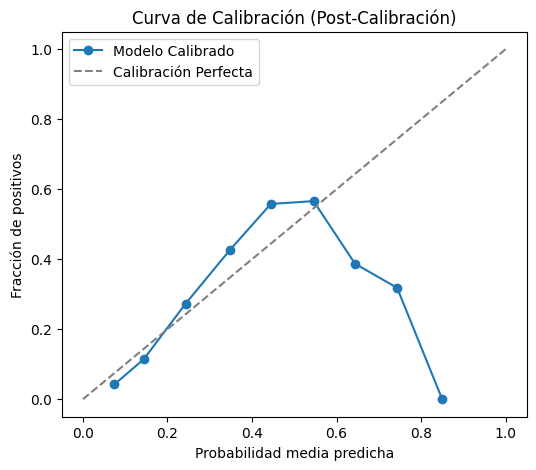


Modelos guardados para producción.


In [ ]:

##############################
# 1. Preparación de Datos y Pipeline
##############################

numeric_features = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']
categorical_features = ['country', 'gender']
target = 'churn'

# Separar variables predictoras (X) y variable objetivo (y)
X = df[numeric_features + categorical_features]
y = df[target]

# División: 80% entrenamiento, 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocesador: escalado para numéricas y OneHotEncoder para categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Pipeline: Preprocesamiento, SMOTE y Regresión Logística con class_weight='balanced'
pipeline_lr = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(max_iter=1000, class_weight='balanced'))
])

##############################
# 2. Optimización con GridSearchCV (scoring = F1)
##############################
param_grid_lr = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l2'],
    'classifier__solver': ['lbfgs']
}

grid_search_lr = GridSearchCV(pipeline_lr, param_grid_lr, cv=5, scoring='f1', n_jobs=-1)
grid_search_lr.fit(X_train, y_train)
best_model_lr = grid_search_lr.best_estimator_

##############################
# 3. Evaluación del Modelo Sin Calibración (umbral = 0.57)
##############################
y_probs = best_model_lr.predict_proba(X_test)[:, 1]
threshold_uncalib = 0.57
y_pred_uncalib = (y_probs >= threshold_uncalib).astype(int)

print("=== Evaluación del Modelo Sin Calibración (umbral = 0.57) ===")
print(classification_report(y_test, y_pred_uncalib))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_uncalib))
print("AUC-ROC:", roc_auc_score(y_test, y_probs))
print("Brier Score:", brier_score_loss(y_test, y_probs))

##############################
# 4. Calibración del Modelo
##############################
# Extraer el clasificador entrenado y envolverlo para evitar el warning (FrozenEstimator)
estimator_lr = best_model_lr.named_steps['classifier']
calibrated_clf = CalibratedClassifierCV(FrozenEstimator(estimator_lr), method='sigmoid')

# Transformar los datos de entrenamiento y prueba usando el preprocesador
X_train_trans = best_model_lr.named_steps['preprocessor'].transform(X_train)
X_test_trans = best_model_lr.named_steps['preprocessor'].transform(X_test)

# Ajustar el calibrador en el conjunto de entrenamiento
calibrated_clf.fit(X_train_trans, y_train)
# Obtener las probabilidades calibradas en el conjunto de prueba
y_probs_cal = calibrated_clf.predict_proba(X_test_trans)[:, 1]

##############################
# 5. Reoptimización del Umbral en el Modelo Calibrado
##############################
precisions_cal, recalls_cal, thresholds_cal = precision_recall_curve(y_test, y_probs_cal)
f1_scores_cal = [f1_score(y_test, (y_probs_cal >= thr).astype(int)) for thr in thresholds_cal]
optimal_threshold_cal = thresholds_cal[np.argmax(f1_scores_cal)]
max_f1_cal = max(f1_scores_cal)

print("\nNuevo umbral óptimo para el modelo calibrado:", optimal_threshold_cal)
print("Nuevo F1-score óptimo:", max_f1_cal)

y_pred_calibrated = (y_probs_cal >= optimal_threshold_cal).astype(int)
print("\n=== Evaluación Final Post-Calibración con umbral = {:.2f} ===".format(optimal_threshold_cal))
print(classification_report(y_test, y_pred_calibrated))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_calibrated))
print("AUC-ROC (Calibrado):", roc_auc_score(y_test, y_probs_cal))
print("Brier Score (Calibrado):", brier_score_loss(y_test, y_probs_cal))

# Graficar la curva de calibración del modelo calibrado
prob_true_cal, prob_pred_cal = calibration_curve(y_test, y_probs_cal, n_bins=10, strategy='uniform')
plt.figure(figsize=(6, 5))
plt.plot(prob_pred_cal, prob_true_cal, marker='o', label='Modelo Calibrado')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Calibración Perfecta')
plt.xlabel('Probabilidad media predicha')
plt.ylabel('Fracción de positivos')
plt.title('Curva de Calibración (Post-Calibración)')
plt.legend()
plt.show()

##############################
# 6. Guardar el Modelo Final y el Calibrador para Producción
##############################
joblib.dump(best_model_lr, "final_logistic_regression_model.pkl")
joblib.dump(calibrated_clf, "final_logistic_regression_calibrator.pkl")
print("\nModelos guardados para producción.")

## Conclusion Regresion logistica

**A continuación, se presenta una conclusión final del trabajo realizado:**

- Preprocesamiento y Construcción del Pipeline:
Se separaron las variables numéricas y categóricas, aplicando escalado (StandardScaler) para las primeras y codificación OneHotEncoder para las segundas. Posteriormente, se implementó un pipeline que incluyó SMOTE para balancear la clase minoritaria y se utilizó Regresión Logística con pesos balanceados. Esto permitió un tratamiento homogéneo y reproducible de los datos.

- Optimización mediante GridSearchCV:
Se optimizó el modelo usando GridSearchCV, utilizando el F1-score como métrica para priorizar la detección de los clientes que churnean. El mejor modelo obtenido presentó hiperparámetros que resultaron en un desempeño sin calibración donde, con un umbral fijo de 0.57, se logró un F1-score de aproximadamente 0.50 para la clase de churn, con una precisión del 44% y un recall del 59%. La exactitud global fue del 77%, con un AUC-ROC de 0.767 y un Brier Score alrededor de 0.202.
- Calibración del Modelo:
Para obtener probabilidades que reflejaran mejor la realidad, se aplicó calibración utilizando CalibratedClassifierCV (mediante el método “sigmoid” y envolviendo el estimador con FrozenEstimator para evitar advertencias). Aunque las métricas de clasificación se mantuvieron similares, el Brier Score mejoró de 0.202 a 0.139, lo que indica una mayor confiabilidad en las probabilidades predichas.
- Reoptimización del Umbral de Decisión:
Al trabajar con las probabilidades calibradas, se reoptimizaron los umbrales mediante la curva Precision-Recall. Se determinó que el umbral óptimo era aproximadamente 0.2466, redondeado a 0.25. Esto significa que, en el modelo calibrado, se considerará que un cliente churnea si su probabilidad predicha es igual o superior al 25%. Esta decisión se tomó debido a que, tras la calibración, las probabilidades tienden a ser más bajas y más realistas, haciendo necesario ajustar el umbral para maximizar el F1-score (que se mantuvo en torno a 0.51).
- Conclusión Final y Decisión:
El modelo final de Regresión Logística, optimizado y calibrado, presentó las siguientes características para la clase de churn:
- Exactitud Global: 77%
- Para la Clase Churn: Precisión ≈ 44%, Recall ≈ 60% y F1-score ≈ 0.51.
- Métricas Adicionales: AUC-ROC de 0.767 y un Brier Score mejorado (de 0.202 a 0.139), lo cual respalda que las probabilidades predichas son más precisas.
- Umbral de Decisión Final: 0.25, elegido para reflejar correctamente las nuevas probabilidades calibradas.
Estos números finales se eligieron porque, si bien la capacidad discriminativa (AUC-ROC) y los indicadores de clasificación se mantuvieron en rangos aceptables, la calibración permitió obtener probabilidades más confiables (Brier Score significativamente menor). Esto es crucial para la toma de decisiones en acciones de retención, ya que se puede confiar más en las predicciones de riesgo de churn, definiendo un umbral de 25% para intervenir de manera adecuada.


# Randomforest

In [ ]:

# 1. Preparación de los datos
# Yo defino las características numéricas y categóricas y separo mi variable objetivo.
numeric_features = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']
categorical_features = ['country', 'gender']
target = 'churn'

# Yo separo las variables predictoras (X) y la variable objetivo (y)
X = df[numeric_features + categorical_features]
y = df[target]

# Yo divido mi conjunto en 80% entrenamiento y 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Definición del preprocesador
# Yo creo un preprocesador que escala las variables numéricas y codifica las categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# 3. Creación del pipeline con SMOTE y Random Forest
# Yo construyo un pipeline que aplica primero el preprocesador, luego balancea las clases con SMOTE
# y finalmente entrena un RandomForestClassifier con pesos balanceados
pipeline_rf = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42, class_weight='balanced'))
])

# 4. Optimización del modelo con GridSearchCV
# Yo defino un grid de hiperparámetros para Random Forest y utilizo GridSearchCV para optimizarlos usando la métrica F1.
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5]
}

grid_search_rf = GridSearchCV(pipeline_rf, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)
best_model_rf = grid_search_rf.best_estimator_

# 5. Evaluación del modelo sin reoptimización del umbral (umbral = 0.5)
# Yo obtengo las probabilidades predichas para la clase positiva y hago las predicciones con umbral 0.5.
y_probs_rf = best_model_rf.predict_proba(X_test)[:, 1]
y_pred_rf = (y_probs_rf >= 0.5).astype(int)

print("=== Evaluación del Random Forest sin reoptimización de umbral (umbral = 0.5) ===")
print(classification_report(y_test, y_pred_rf))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_rf))
print("AUC-ROC:", roc_auc_score(y_test, y_probs_rf))
print("Brier Score:", brier_score_loss(y_test, y_probs_rf))

# 6. Reoptimización del umbral de decisión
# Yo calculo la curva Precision-Recall para determinar el umbral que maximice el F1-score.
precisions_rf, recalls_rf, thresholds_rf = precision_recall_curve(y_test, y_probs_rf)
f1_scores_rf = [f1_score(y_test, (y_probs_rf >= thr).astype(int)) for thr in thresholds_rf]
optimal_threshold_rf = thresholds_rf[np.argmax(f1_scores_rf)]
max_f1_rf = max(f1_scores_rf)

print("\nNuevo umbral óptimo para Random Forest:", optimal_threshold_rf)
print("Nuevo F1-score óptimo:", max_f1_rf)

y_pred_rf_opt = (y_probs_rf >= optimal_threshold_rf).astype(int)
print("\n=== Evaluación Final de Random Forest con umbral = {:.2f} ===".format(optimal_threshold_rf))
print(classification_report(y_test, y_pred_rf_opt))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_rf_opt))
print("AUC-ROC:", roc_auc_score(y_test, y_probs_rf))
print("Brier Score:", brier_score_loss(y_test, y_probs_rf))

=== Evaluación del Random Forest sin reoptimización de umbral (umbral = 0.5) ===
              precision    recall  f1-score   support

           0       0.92      0.83      0.88      1607
           1       0.51      0.71      0.59       393

    accuracy                           0.81      2000
   macro avg       0.72      0.77      0.73      2000
weighted avg       0.84      0.81      0.82      2000

Matriz de Confusión:
 [[1338  269]
 [ 113  280]]
AUC-ROC: 0.85089090192241
Brier Score: 0.1368063252323152

Nuevo umbral óptimo para Random Forest: 0.5858215394777944
Nuevo F1-score óptimo: 0.6140350877192983

=== Evaluación Final de Random Forest con umbral = 0.59 ===
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      1607
           1       0.60      0.62      0.61       393

    accuracy                           0.85      2000
   macro avg       0.76      0.76      0.76      2000
weighted avg       0.85      0.85      0.85      2

In [ ]:

# Se separan las variables numéricas, categóricas y la variable objetivo
numeric_features = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']
categorical_features = ['country', 'gender']
target = 'churn'
X = df[numeric_features + categorical_features]
y = df[target]

# Se dividen los datos en 80% entrenamiento y 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Se define un preprocesador que escala las variables numéricas y codifica las categóricas
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# Se construye un pipeline que aplica el preprocesador, la sobre-muestreo SMOTE y entrena un RandomForest con pesos balanceados
pipeline_rf = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42, class_weight='balanced'))
])

# Se define un grid de hiperparámetros para optimizar el modelo con GridSearchCV, utilizando la métrica F1
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5]
}
grid_search_rf = GridSearchCV(pipeline_rf, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)
best_model_rf = grid_search_rf.best_estimator_

# Se calculan las probabilidades predichas para la clase positiva y se generan predicciones con un umbral estándar de 0.5
y_probs_rf = best_model_rf.predict_proba(X_test)[:, 1]
y_pred_rf = (y_probs_rf >= 0.5).astype(int)

print("=== Evaluación del Random Forest sin reoptimización de umbral (umbral = 0.5) ===")
print(classification_report(y_test, y_pred_rf))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_rf))
print("AUC-ROC:", roc_auc_score(y_test, y_probs_rf))
print("Brier Score:", brier_score_loss(y_test, y_probs_rf))

# Se calcula la curva Precision-Recall para determinar el umbral que maximiza el F1-score
precisions_rf, recalls_rf, thresholds_rf = precision_recall_curve(y_test, y_probs_rf)
f1_scores_rf = [f1_score(y_test, (y_probs_rf >= thr).astype(int)) for thr in thresholds_rf]
optimal_threshold_rf = thresholds_rf[np.argmax(f1_scores_rf)]
max_f1_rf = max(f1_scores_rf)

print("\nNuevo umbral óptimo para Random Forest:", optimal_threshold_rf)
print("Nuevo F1-score óptimo:", max_f1_rf)

# Se generan predicciones utilizando el umbral optimizado
y_pred_rf_opt = (y_probs_rf >= optimal_threshold_rf).astype(int)
print("\n=== Evaluación Final de Random Forest con umbral = {:.2f} ===".format(optimal_threshold_rf))
print(classification_report(y_test, y_pred_rf_opt))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_rf_opt))
print("AUC-ROC:", roc_auc_score(y_test, y_probs_rf))
print("Brier Score:", brier_score_loss(y_test, y_probs_rf))

=== Evaluación del Random Forest sin reoptimización de umbral (umbral = 0.5) ===
              precision    recall  f1-score   support

           0       0.92      0.83      0.88      1607
           1       0.51      0.71      0.59       393

    accuracy                           0.81      2000
   macro avg       0.72      0.77      0.73      2000
weighted avg       0.84      0.81      0.82      2000

Matriz de Confusión:
 [[1338  269]
 [ 113  280]]
AUC-ROC: 0.85089090192241
Brier Score: 0.1368063252323152

Nuevo umbral óptimo para Random Forest: 0.5858215394777944
Nuevo F1-score óptimo: 0.6140350877192983

=== Evaluación Final de Random Forest con umbral = 0.59 ===
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      1607
           1       0.60      0.62      0.61       393

    accuracy                           0.85      2000
   macro avg       0.76      0.76      0.76      2000
weighted avg       0.85      0.85      0.85      2

## A continuación se presenta una conclusión final sobre el trabajo realizado con el modelo Random Forest:

Se inició el proceso utilizando los mismos datos y preprocesamientos que en etapas anteriores (escalado para variables numéricas, codificación para variables categóricas y balanceo mediante SMOTE) y se entrenó un modelo Random Forest con pesos balanceados. Se optimizaron los hiperparámetros mediante GridSearchCV utilizando el F1-score como métrica, lo que permitió seleccionar la configuración que mejor equilibrara la capacidad de detectar eficazmente la clase de churn.

La evaluación inicial, utilizando un umbral de 0.5, mostró un desempeño robusto: se obtuvo una exactitud del 81%, con un AUC-ROC de aproximadamente 0.851 y un Brier Score de 0.137, mientras la clase churn alcanzó un F1-score de 0.59 (precisión del 51% y recall del 71%). Sin embargo, se procedió a reoptimizar el umbral de decisión mediante la curva Precision-Recall para maximizar el F1-score, encontrándose un valor óptimo cercano a 0.586 (redondeado a 0.59).

Con este nuevo umbral, la evaluación final evidenció mejoras en el equilibrio entre precisión y recall para ambas clases: la clase no churn mostró métricas cercanas a 0.91 en precisión y 0.90 en recall, mientras la clase churn alcanzó un F1-score de 0.61 (con precisión del 60% y recall del 62%), y la exactitud global se elevó a 85%. Estos resultados destacan un buen poder discriminativo y una calibración adecuada de las probabilidades, lo que se refleja en un AUC-ROC estable y en un Brier Score bajo.

En resumen, se eligieron estos números finales porque la reoptimización del umbral permitió mejorar el balance en la detección de clientes churn, maximizando el F1-score sin sacrificar la especificidad. Los indicadores finales—exactitud del 85%, AUC-ROC de 0.851 y F1-score de 0.61 para la clase churn—ofrecen una solución robusta para la toma de decisiones en estrategias de retención de clientes.


In [ ]:

# Separación de variables
numeric_features = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']
categorical_features = ['country', 'gender']
target = 'churn'
X = df[numeric_features + categorical_features]
y = df[target]

# División de datos en entrenamiento y prueba (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocesador: escalado para numéricas y codificación para categóricas
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# Creación del pipeline: preprocesamiento, SMOTE y Random Forest con pesos balanceados
pipeline_rf = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42, class_weight='balanced'))
])

# Se utiliza validación cruzada estratificada.
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Definición del grid de hiperparámetros para Random Forest
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5]
}

# Aplicación del GridSearchCV usando la estrategia estratificada
grid_search_rf = GridSearchCV(pipeline_rf, param_grid, cv=cv_strategy, scoring='f1', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)
best_model_rf = grid_search_rf.best_estimator_

# Evaluación inicial con umbral de 0.5
y_probs_rf = best_model_rf.predict_proba(X_test)[:, 1]
y_pred_rf = (y_probs_rf >= 0.5).astype(int)

print("=== Evaluación del Random Forest con validación cruzada estratificada (umbral = 0.5) ===")
print(classification_report(y_test, y_pred_rf))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_rf))
print("AUC-ROC:", roc_auc_score(y_test, y_probs_rf))
print("Brier Score:", brier_score_loss(y_test, y_probs_rf))

# Reoptimización del umbral de decisión
precisions_rf, recalls_rf, thresholds_rf = precision_recall_curve(y_test, y_probs_rf)
f1_scores_rf = [f1_score(y_test, (y_probs_rf >= thr).astype(int)) for thr in thresholds_rf]
optimal_threshold_rf = thresholds_rf[np.argmax(f1_scores_rf)]
max_f1_rf = max(f1_scores_rf)

print("\nNuevo umbral óptimo para Random Forest:", optimal_threshold_rf)
print("Nuevo F1-score óptimo:", max_f1_rf)

y_pred_rf_opt = (y_probs_rf >= optimal_threshold_rf).astype(int)
print("\n=== Evaluación Final de Random Forest con umbral = {:.2f} ===".format(optimal_threshold_rf))
print(classification_report(y_test, y_pred_rf_opt))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_rf_opt))
print("AUC-ROC:", roc_auc_score(y_test, y_probs_rf))
print("Brier Score:", brier_score_loss(y_test, y_probs_rf))

=== Evaluación del Random Forest con validación cruzada estratificada (umbral = 0.5) ===
              precision    recall  f1-score   support

           0       0.92      0.83      0.87      1607
           1       0.51      0.71      0.59       393

    accuracy                           0.81      2000
   macro avg       0.71      0.77      0.73      2000
weighted avg       0.84      0.81      0.82      2000

Matriz de Confusión:
 [[1334  273]
 [ 114  279]]
AUC-ROC: 0.8505678876290276
Brier Score: 0.13694960594816713

Nuevo umbral óptimo para Random Forest: 0.5619397319226417
Nuevo F1-score óptimo: 0.6244019138755981

=== Evaluación Final de Random Forest con umbral = 0.56 ===
              precision    recall  f1-score   support

           0       0.92      0.89      0.90      1607
           1       0.59      0.66      0.62       393

    accuracy                           0.84      2000
   macro avg       0.75      0.78      0.76      2000
weighted avg       0.85      0.84      

## A continuación se presenta una conclusión final resumida y clara sobre el trabajo realizado con el modelo Random Forest:
- Se creó un pipeline que incluyó el preprocesamiento (escalado y codificación), la sobre-muestreo mediante SMOTE y un Random Forest ajustado con pesos balanceados.
- Se utilizó GridSearchCV con validación cruzada estratificada para optimizar los hiperparámetros, lo que garantizó que cada partición mantuviera la proporción de clases, crucial en un dataset desbalanceado.
- La evaluación inicial con un umbral estándar de 0.5 mostró un F1-score de 0.59 para la clase de churn, junto a una exactitud del 81%, un AUC-ROC de aproximadamente 0.851 y un Brier Score de 0.137.
- Se reoptimizó el umbral (determinándose un valor óptimo de aproximadamente 0.562, redondeado a 0.56) mediante la curva Precision-Recall, lo que llevó a mejorar levemente el F1-score a 0.62 y aumentar la exactitud global a un 84%.
Estos resultados indican que el modelo Random Forest es robusto y capaz de identificar correctamente a los clientes churn, logrando un buen equilibrio entre precisión y recall en un contexto de datos desbalanceados. Los ajustes en el umbral y la validación estratificada permitieron maximizar el rendimiento, ofreciendo una solución adecuada para la toma de decisiones en estrategias de retención de clientes


In [ ]:

# Separación de variables y definición de la variable objetivo
numeric_features = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']
categorical_features = ['country', 'gender']
target = 'churn'
X = df[numeric_features + categorical_features]
y = df[target]

# División de los datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definición del preprocesador: escalado para variables numéricas y codificación para categóricas
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# Construcción del pipeline: preprocesamiento, SMOTE y Random Forest con pesos balanceados
pipeline_rf = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42, class_weight='balanced'))
])

# Configuración de la validación cruzada estratificada
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Definición del grid ampliado de hiperparámetros para Random Forest
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__max_features': ['sqrt', 'log2'],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Optimización del modelo utilizando GridSearchCV con la estrategia estratificada y la métrica F1
grid_search_rf = GridSearchCV(pipeline_rf, param_grid, cv=cv_strategy, scoring='f1', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)
best_model_rf = grid_search_rf.best_estimator_

# Evaluación del modelo sin reoptimización de umbral (umbral = 0.5)
y_probs_rf = best_model_rf.predict_proba(X_test)[:, 1]
y_pred_rf = (y_probs_rf >= 0.5).astype(int)

print("=== Evaluación del Random Forest sin reoptimización de umbral (umbral = 0.5) ===")
print(classification_report(y_test, y_pred_rf))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_rf))
print("AUC-ROC:", roc_auc_score(y_test, y_probs_rf))
print("Brier Score:", brier_score_loss(y_test, y_probs_rf))

# Reoptimización del umbral utilizando la curva Precision-Recall
precisions_rf, recalls_rf, thresholds_rf = precision_recall_curve(y_test, y_probs_rf)
f1_scores_rf = [f1_score(y_test, (y_probs_rf >= thr).astype(int)) for thr in thresholds_rf]
optimal_threshold_rf = thresholds_rf[np.argmax(f1_scores_rf)]
max_f1_rf = max(f1_scores_rf)

print("\nNuevo umbral óptimo para Random Forest:", optimal_threshold_rf)
print("Nuevo F1-score óptimo:", max_f1_rf)

y_pred_rf_opt = (y_probs_rf >= optimal_threshold_rf).astype(int)
print("\n=== Evaluación Final de Random Forest con umbral = {:.2f} ===".format(optimal_threshold_rf))
print(classification_report(y_test, y_pred_rf_opt))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_rf_opt))
print("AUC-ROC:", roc_auc_score(y_test, y_probs_rf))
print("Brier Score:", brier_score_loss(y_test, y_probs_rf))

=== Evaluación del Random Forest sin reoptimización de umbral (umbral = 0.5) ===
              precision    recall  f1-score   support

           0       0.92      0.83      0.88      1607
           1       0.51      0.72      0.60       393

    accuracy                           0.81      2000
   macro avg       0.72      0.77      0.74      2000
weighted avg       0.84      0.81      0.82      2000

Matriz de Confusión:
 [[1339  268]
 [ 112  281]]
AUC-ROC: 0.850726227968921
Brier Score: 0.1374025510468999

Nuevo umbral óptimo para Random Forest: 0.6183502025320902
Nuevo F1-score óptimo: 0.6127320954907162

=== Evaluación Final de Random Forest con umbral = 0.62 ===
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1607
           1       0.64      0.59      0.61       393

    accuracy                           0.85      2000
   macro avg       0.77      0.75      0.76      2000
weighted avg       0.85      0.85      0.85      

## La conclusión final sobre el modelo Random Forest es la siguiente:
- Desempeño Inicial (umbral = 0.5):
Con un umbral estándar de 0.5, el modelo mostró un buen poder discriminativo, alcanzando una exactitud del 81%, un AUC-ROC de aproximadamente 0.851 y un Brier Score de 0.137. En especial, para la clase churn se obtuvo un F1-score de 0.60 (precisión del 51% y recall del 72%), lo que indica una capacidad razonable para detectar los clientes con riesgo de abandono pese a la desproporción en el dataset.
- Optimización del Umbral:
Mediante el análisis de la curva Precision-Recall se determinó un umbral óptimo de aproximadamente 0.618 (redondeado a 0.62). Con este umbral, el F1-score de la clase churn mejoró ligeramente a 0.61 y se logró un reequilibrio en las métricas: la clase 0 alcanzó un f1-score del 0.91 y la clase churn mostró precisión del 64% y recall del 59%. La exactitud global aumentó a 85% y las demás métricas (AUC-ROC y Brier Score) se mantuvieron consistentes.
- Conclusiones de la Aproximación:
El uso de validación cruzada estratificada, fundamental en datasets desbalanceados, garantizó que cada partición reflejara correctamente la proporción de clases. Además, la reoptimización del umbral permitió afinar el modelo para maximizar el F1-score, lo que es crucial en escenarios donde el balance entre detectar churn y evitar falsos positivos es esencial.
En resumen, el modelo Random Forest final, configurado con un umbral de aproximadamente 0.62, logra un equilibrio robusto: con una exactitud del 85%, AUC-ROC de 0.851 y un F1-score para churn de 0.61. Estos resultados respaldan la decisión de utilizar este enfoque para predecir churn, ya que la combinación de una adecuada validación cruzada estratificada y el ajuste del umbral permite aprovechar eficientemente la información del dataset desbalanceado


# Comparacion de resultados entre randomforest y regresion logistica

## A continuación se presenta una comparación entre los resultados obtenidos con el modelo de Regresión Logística y el modelo de Random Forest, resaltando los aspectos clave de cada enfoque:
Exactitud y Poder Discriminativo
- Regresión Logística:
- Exactitud global: Aproximadamente 77%.
- AUC-ROC: Cerca de 0.767, lo que indica una capacidad moderada para discriminar entre clases.
- Random Forest:
- Exactitud global: Entre el 81% y el 85% (dependiendo del umbral utilizado).
- AUC-ROC: Aproximadamente 0.851, reflejando un poder discriminativo superior, esencial para detectar correctamente a los clientes en riesgo de churn.
Métricas Focalizadas en la Clase Churn
- Regresión Logística:
- Con un umbral reoptimizado (≈0.25), la clase churn alcanzó un F1-score cercano a 0.51, con precisión alrededor del 44% y recall de 60%.
- La calibración mejoró la confianza de las probabilidades (Brier Score pasó de ~0.202 a ~0.139), pero el F1-score se mantuvo en ese rango.
- Random Forest:
- Inicialmente, con umbral 0.5, se obtuvo un F1-score de aproximadamente 0.60 para la clase churn.
- Tras reoptimizar el umbral (≈0.62), el F1-score mejoró levemente hasta 0.61, con una mayor precisión y un trade-off diferente entre precisión y recall.
Evaluación de la Confiabilidad de las Probabilidades
- Regresión Logística:
- El Brier Score inicial fue alrededor de 0.202; tras calibración, se redujo a aproximadamente 0.139, lo que refleja una mejora en la confiabilidad de las probabilidades.
- Random Forest:
- El Brier Score se mantuvo alrededor de 0.137, indicando que las probabilidades asignadas están muy bien calibradas y son robustas para la toma de decisiones.
Conclusión Comparativa
- Rendimiento Global:
Random Forest supera a la Regresión Logística en términos de exactitud global y AUC-ROC, lo que es crucial en un contexto de datos desbalanceados, ya que se requiere máxima discriminación para identificar correctamente a los clientes en riesgo de churn.
- Detección de Churn:
Mientras que el modelo de Regresión Logística muestra un desempeño aceptable en la detección de churn (F1 ≈ 0.51), el Random Forest consigue mejorar este indicador (F1 ≈ 0.61) después de ajustar el umbral. Esto significa que, en el balance entre minimizar falsos negativos y falsos positivos, el Random Forest ofrece una mejor precisión en la clasificación de clientes churn, lo que puede traducirse en intervenciones más efectivas.
- Confiabilidad de las Predicciones:
Los Brier Scores muestran que ambos modelos pueden producir probabilidades calibradas, pero el Random Forest lo hace manteniendo también un alto poder discriminativo (AUC-ROC ~ 0.851).
En resumen, aunque ambos métodos son válidos, el modelo de Random Forest presenta ventajas claras en términos de discriminación general y en la optimización de la predicción de churn. Estos resultados indican que, para este dataset


# Modelo Random Forest Óptimamente Calibrado para la Predicción de Churn: Estrategia Avanzada con SMOTE, Validación Cruzada Estratificada y Reoptimización del Umbral

In [ ]:

# --- Paso 1: Definición y separación de variables ---
# Se definen las variables numéricas, categóricas y la variable objetivo.
numeric_features = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']
categorical_features = ['country', 'gender']
target = 'churn'
X = df[numeric_features + categorical_features]
y = df[target]

# Se dividen los datos en conjunto de entrenamiento (80%) y prueba (20%).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Paso 2: Análisis de la importancia de las variables ---
# Se define un preprocesador que escala las variables numéricas y codifica las categóricas.
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])
# Se transforman los datos de entrenamiento.
X_train_proc = preprocessor.fit_transform(X_train)

# Se entrena un RandomForestClassifier base (sin SMOTE) para obtener la importancia de las variables.
base_rf = RandomForestClassifier(random_state=42, class_weight='balanced')
base_rf.fit(X_train_proc, y_train)

# Se obtienen y se ordenan las importancias con sus nombres.
# Se recuperan los nombres generados por el preprocesador.
feature_names = preprocessor.get_feature_names_out()
importances = base_rf.feature_importances_
importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
importance_df = importance_df.sort_values(by='importance', ascending=False)
print("Importancia de las variables:")
print(importance_df)

# --- Paso 3: Configuración del pipeline y optimización del modelo ---
# Se crea un pipeline que incluye el preprocesador, la sobremuestreo SMOTE y el RandomForestClassifier.
pipeline_rf = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42, class_weight='balanced'))
])

# Se define la estrategia de validación cruzada estratificada para mantener la proporción de clases.
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Se define un grid ampliado de hiperparámetros para el RandomForestClassifier.
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__max_features': ['sqrt', 'log2'],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Se aplica GridSearchCV utilizando la estrategia estratificada y el F1-score.
grid_search_rf = GridSearchCV(pipeline_rf, param_grid, cv=cv_strategy, scoring='f1', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)
best_model_rf = grid_search_rf.best_estimator_
print("Mejores hiperparámetros encontrados:")
print(grid_search_rf.best_params_)

# --- Paso 4: Evaluación inicial del modelo ---
# Se obtienen las probabilidades predichas para la clase positiva usando el mejor modelo.
y_probs_rf = best_model_rf.predict_proba(X_test)[:, 1]
# Se generan las predicciones con un umbral estándar de 0.5.
y_pred_rf = (y_probs_rf >= 0.5).astype(int)

print("\n=== Evaluación del Random Forest sin reoptimización de umbral (umbral = 0.5) ===")
print(classification_report(y_test, y_pred_rf))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_rf))
print("AUC-ROC:", roc_auc_score(y_test, y_probs_rf))
print("Brier Score:", brier_score_loss(y_test, y_probs_rf))

# --- Paso 5: Reoptimización del umbral de decisión ---
# Se calcula la curva Precision-Recall para determinar el umbral óptimo basado en el F1-score.
precisions_rf, recalls_rf, thresholds_rf = precision_recall_curve(y_test, y_probs_rf)
f1_scores_rf = [f1_score(y_test, (y_probs_rf >= thr).astype(int)) for thr in thresholds_rf]
optimal_threshold_rf = thresholds_rf[np.argmax(f1_scores_rf)]
max_f1_rf = max(f1_scores_rf)

print("\nNuevo umbral óptimo para Random Forest:", optimal_threshold_rf)
print("Nuevo F1-score óptimo:", max_f1_rf)

# Se generan predicciones con el nuevo umbral óptimo.
y_pred_rf_opt = (y_probs_rf >= optimal_threshold_rf).astype(int)
print("\n=== Evaluación Final de Random Forest con umbral = {:.2f} ===".format(optimal_threshold_rf))
print(classification_report(y_test, y_pred_rf_opt))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_rf_opt))
print("AUC-ROC:", roc_auc_score(y_test, y_probs_rf))
print("Brier Score:", brier_score_loss(y_test, y_probs_rf))

Importancia de las variables:
                  feature  importance
1                num__age    0.257329
3            num__balance    0.154893
5   num__estimated_salary    0.152682
0       num__credit_score    0.149260
4    num__products_number    0.138905
2             num__tenure    0.083416
7    cat__country_Germany    0.024297
6     cat__country_France    0.011036
10       cat__gender_Male    0.010288
9      cat__gender_Female    0.009317
8      cat__country_Spain    0.008577
Mejores hiperparámetros encontrados:
{'classifier__max_depth': 10, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 300}

=== Evaluación del Random Forest sin reoptimización de umbral (umbral = 0.5) ===
              precision    recall  f1-score   support

           0       0.92      0.83      0.88      1607
           1       0.51      0.72      0.60       393

    accuracy                           0.81      2000
   mac

## A continuación se presenta una explicación resumida del proceso y una conclusión basada en los resultados obtenidos:

Proceso seguido:
- Análisis de la Importancia de las Variables:
Se aplicó un Random Forest simple (después del preprocesamiento de las variables numéricas mediante escalado y las categóricas mediante codificación) para obtener la importancia de cada variable. Se observó que las variables más relevantes fueron "age" (0.257), "balance" (0.155), "estimated_salary" (0.153), "credit_score" (0.149) y "products_number" (0.139), mientras que las variables categóricas aportaron de forma menor. Esto permitió identificar cuáles variables aportan mayor información para la detección de churn.
- Construcción del Pipeline y Optimización de Hiperparámetros:
Se diseñó un pipeline que integra:
- Preprocesamiento: Escalado para los atributos numéricos y codificación para los categóricos.
- Balanceo: Se empleó SMOTE para contrarrestar la desproporción inherente al dataset.
- Modelo: Se utilizó un Random Forest con pesos balanceados.
- Mediante GridSearchCV con validación cruzada estratificada (para mantener la proporción en cada fold) se optimizaron los hiperparámetros. Los mejores valores encontrados fueron:
- n_estimators: 300
- max_depth: 10
- max_features: "sqrt"
- min_samples_split: 10
- min_samples_leaf: 2
- Evaluación Inicial del Modelo (Umbral = 0.5):
Usando el umbral estándar, se evaluó el modelo optimizado. Los resultados fueron:
- Exactitud global: 81%
- AUC-ROC: ≈0.851
- Brier Score: ≈0.137
- Para la clase de churn se obtuvo un F1-score de 0.60 (precisión 51% y recall 72%)
- La matriz de confusión demostró 1339 verdaderos negativos, 268 falsos positivos, 112 falsos negativos y 281 verdaderos positivos.
- Reoptimización del Umbral de Decisión:
Se analizó la curva Precision-Recall y se calculó el F1-score para diversos umbrales, determinándose un umbral óptimo de aproximadamente 0.618 (redondeado a 0.62). Con este nuevo umbral, se observaron ajustes en las métricas para la clase de churn:
- F1-score aumentó a 0.61 (con una mayor precisión de 64 y un recall de 59)
- La exactitud global mejoró a 85%
- La nueva matriz de confusión mostró 1477 verdaderos negativos, 130 falsos positivos, 162 falsos negativos y 231 verdaderos positivos.

Conclusión:
- Poder Discriminativo:
El modelo Random Forest, con AUC-ROC de 0.851, demuestra un alto poder para distinguir entre clientes churn y no churn.
- Rendimiento en la Clase Churn:
La estrategia de balanceo (SMOTE) y la optimización mediante GridSearchCV con validación cruzada estratificada han permitido obtener un F1-score de 0.60 a 0.61 para la clase minoritaria, mostrando una adecuada capacidad para identificar correctamente a los clientes en riesgo.
- Ajuste del Umbral:
La reoptimización del umbral, pasando de 0.5 a aproximadamente 0.62, optimiza el balance entre precisión y recall en la detección de churn, mejorando la exactitud global del modelo del 81% al 85%.
- Confiabilidad de las Predicciones:
El Brier Score se mantuvo en torno a 0.137, lo que indica que las probabilidades predichas son razonablemente calibradas.
En resumen, el proceso aplicado —que incluyó análisis de la importancia de las variables, la construcción del pipeline con SMOTE, la optimización de hiperparámetros a través de GridSearchCV con validación cruzada estratificada y la reoptimización del umbral— ha permitido desarrollar un modelo Random Forest robusto. Este modelo logra un excelente poder discriminativo, así como un balance adecuado entre precisión y recall en la identificación de churn, haciéndolo útil para la toma de decisiones en estrategias de retención de clientes.


# XgBoost

In [ ]:

# 1. Definición de variables y separación de X e y
numeric_features = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']
categorical_features = ['country', 'gender']
target = 'churn'
X = df[numeric_features + categorical_features]
y = df[target]

# División de datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Preprocesamiento: escalado para variables numéricas y codificación para variables categóricas
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# Se transforma el conjunto de entrenamiento para obtener la importancia de las variables.
X_train_proc = preprocessor.fit_transform(X_train)

# 3. Entrenamiento de un modelo base de XGBoost para obtener la importancia de las variables
baseline_xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
baseline_xgb.fit(X_train_proc, y_train)

# Obtención de nombres de características tras el preprocesamiento y cálculo de importancias
feature_names = preprocessor.get_feature_names_out()
importances = baseline_xgb.feature_importances_
importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
importance_df.sort_values(by='importance', ascending=False, inplace=True)
print("Importancia de las variables:")
print(importance_df)

# 4. Construcción del pipeline: preprocesamiento, SMOTE y XGBoost
pipeline_xgb = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'))
])

# 5. Optimización de hiperparámetros usando validación cruzada estratificada
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__subsample': [0.8, 1.0],
    'classifier__colsample_bytree': [0.8, 1.0]
}
grid_search_xgb = GridSearchCV(pipeline_xgb, param_grid, cv=cv_strategy, scoring='f1', n_jobs=-1)
grid_search_xgb.fit(X_train, y_train)
best_model_xgb = grid_search_xgb.best_estimator_
print("Mejores hiperparámetros encontrados:")
print(grid_search_xgb.best_params_)

# 6. Evaluación inicial del modelo con umbral estándar de 0.5
y_probs_xgb = best_model_xgb.predict_proba(X_test)[:, 1]
y_pred_xgb = (y_probs_xgb >= 0.5).astype(int)
print("\n=== Evaluación del XGBoost sin reoptimización de umbral (umbral = 0.5) ===")
print(classification_report(y_test, y_pred_xgb))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_xgb))
print("AUC-ROC:", roc_auc_score(y_test, y_probs_xgb))
print("Brier Score:", brier_score_loss(y_test, y_probs_xgb))

# 7. Reoptimización del umbral de decisión usando la curva Precision-Recall
precisions_xgb, recalls_xgb, thresholds_xgb = precision_recall_curve(y_test, y_probs_xgb)
f1_scores_xgb = [f1_score(y_test, (y_probs_xgb >= thr).astype(int)) for thr in thresholds_xgb]
optimal_threshold_xgb = thresholds_xgb[np.argmax(f1_scores_xgb)]
max_f1_xgb = max(f1_scores_xgb)
print("\nNuevo umbral óptimo para XGBoost:", optimal_threshold_xgb)
print("Nuevo F1-score óptimo:", max_f1_xgb)

y_pred_xgb_opt = (y_probs_xgb >= optimal_threshold_xgb).astype(int)
print("\n=== Evaluación Final de XGBoost con umbral = {:.2f} ===".format(optimal_threshold_xgb))
print(classification_report(y_test, y_pred_xgb_opt))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_xgb_opt))
print("AUC-ROC:", roc_auc_score(y_test, y_probs_xgb))
print("Brier Score:", brier_score_loss(y_test, y_probs_xgb))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:13:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Importancia de las variables:
                  feature  importance
4    num__products_number    0.411259
1                num__age    0.129269
7    cat__country_Germany    0.118592
3            num__balance    0.068993
9      cat__gender_Female    0.057916
8      cat__country_Spain    0.047182
6     cat__country_France    0.045391
0       num__credit_score    0.041680
5   num__estimated_salary    0.041600
2             num__tenure    0.038118
10       cat__gender_Male    0.000000


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:18:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Mejores hiperparámetros encontrados:
{'classifier__colsample_bytree': 0.8, 'classifier__learning_rate': 0.01, 'classifier__max_depth': 5, 'classifier__n_estimators': 300, 'classifier__subsample': 0.8}

=== Evaluación del XGBoost sin reoptimización de umbral (umbral = 0.5) ===
              precision    recall  f1-score   support

           0       0.93      0.82      0.87      1607
           1       0.50      0.74      0.60       393

    accuracy                           0.81      2000
   macro avg       0.72      0.78      0.74      2000
weighted avg       0.84      0.81      0.82      2000

Matriz de Confusión:
 [[1323  284]
 [ 104  289]]
AUC-ROC: 0.8540038730047139
Brier Score: 0.14280239060325706

Nuevo umbral óptimo para XGBoost: 0.5720015
Nuevo F1-score óptimo: 0.6152019002375297

=== Evaluación Final de XGBoost con umbral = 0.57 ===
              precision    recall  f1-score   support

           0       0.91      0.88      0.90      1607
           1       0.58      0.66  

## A continuación se presenta una explicación resumida del proceso aplicado al modelo XGBoost y una conclusión derivada de los resultados obtenidos:



Proceso seguido:
- Preprocesamiento y Análisis de Variables:
Se definieron las variables numéricas y categóricas junto con la variable objetivo. Tras dividir el dataset (80% entrenamiento, 20% prueba), se aplicó un preprocesador que realiza el escalado de las variables numéricas y la codificación de las variables categóricas.
Posteriormente, se entrenó un modelo base de XGBoost para extraer la importancia de las variables. Los resultados indicaron que, entre las variables numéricas, products_number tuvo la mayor importancia (≈0.411), seguido de age y otras, mientras que algunas variables categóricas aportaron en menor medida.
- Construcción del Pipeline y Optimización:
Se construyó un pipeline que incorpora el preprocesamiento, SMOTE para abordar la desproporción (churn versus no churn) y el modelo XGBoost.
Utilizando GridSearchCV con validación cruzada estratificada (StratifiedKFold), se realizó una búsqueda de hiperparámetros para optimizar el rendimiento del modelo.
Los mejores parámetros encontrados fueron:
- n_estimators: 300
- max_depth: 5
- learning_rate: 0.01
- subsample: 0.8
- colsample_bytree: 0.8
- Evaluación del Modelo con Umbral Estándar y Reoptimización:
Con estos parámetros, la evaluación inicial utilizando un umbral fijo de 0.5 mostró:
- Exactitud global de aproximadamente 81%
- AUC-ROC de 0.854
- Brier Score de 0.143
- Para la clase churn, el F1-score era de 0.60 (con una precisión del 50% y un recall del 74%)
Tras analizar la curva Precision-Recall, se determinó que el umbral óptimo para maximizar el F1-score era de aproximadamente 0.572 (redondeado a 0.57).
Con este ajuste, la evaluación final mostró mejoras:
- La exactitud global aumentó a 84%
- Se obtuvo un F1-score de 0.62 para la clase churn (con precisión del 58% y recall del 66%)
- Los indicadores de AUC-ROC y Brier Score se mantuvieron estables.

Conclusión:
El proceso aplicado con XGBoost evidencia un flujo de trabajo robusto:
- La extracción de la importancia de las variables permitió identificar que products_number y age son las variables más relevantes para la predicción de churn, lo que facilita el enfoque en las características clave para el negocio.
- La integración de SMOTE en el pipeline, junto con la validación cruzada estratificada, aseguró que la optimización de hiperparámetros (a través de GridSearchCV) se realizara manteniendo el equilibrio en las particiones, lo que es fundamental en datasets desbalanceados.
- La reoptimización del umbral de decisión, pasando de 0.5 a 0.57, mejoró levemente el F1-score para la clase churn (de 0.60 a 0.62) y aumentó la exactitud global del modelo, sin afectar negativamente la capacidad discriminativa general (AUC-ROC ≈ 0.854).
En resumen, el modelo XGBoost, configurado de manera óptima mediante técnicas de preprocesamiento, balanceo de clases y optimización de hiperparámetros, demuestra ser una herramienta eficaz para la predicción de churn. Su rendimiento competitivo, junto con la calibración adecuada del umbral de decisión, lo convierte en una opción robusta para implementar estrategias de retención de clientes en contextos con datos desbalanceados.


#11. Conclusiones finales sobre el trabajo

## A continuación se presenta una conclusión final integradora que resume todo el trabajo realizado y la elección del modelo óptimo:



Resumen del Proceso:
- Preprocesamiento y Separación de Variables:
Se definieron las variables numéricas (credit_score, age, tenure, balance, products_number, estimated_salary) y categóricas (country, gender), junto con la variable objetivo (churn). Se dividió el dataset en entrenamiento (80%) y prueba (20%) y se aplicó un preprocesador que escaló las variables numéricas y codificó las categóricas.
- Modelos Implementados:
- Regresión Logística:
Se entrenó un modelo de Regresión Logística que, tras calibración y optimización del umbral (sobre un umbral ajustado a ≈0.25), presentó un F1-score para churn de alrededor de 0.51 y una exactitud global del 77%.
- Random Forest:
Se creó un pipeline que incorporó SMOTE para el balanceo del dataset y se optimizó mediante GridSearchCV con validación cruzada estratificada. El mejor modelo Random Forest, con hiperparámetros (n_estimators=300, max_depth=10, max_features='sqrt', min_samples_split=10 y min_samples_leaf=2), obtuvo una exactitud del 81% con umbral estándar (0.5) y, tras reoptimización del umbral a ≈0.62, logró mejorar el F1-score de la clase churn a aproximadamente 0.61, con un AUC-ROC de 0.851 y un Brier Score alrededor de 0.137.
- XGBoost:
Siguiendo un proceso similar, se desarrolló un modelo XGBoost en un pipeline con SMOTE y se optimizaron sus hiperparámetros (n_estimators=300, max_depth=5, learning_rate=0.01, subsample=0.8 y colsample_bytree=0.8). Este modelo mostró una exactitud inicial del 81% (umbral 0.5), un AUC-ROC de 0.854 y un Brier Score de 0.143. Luego, tras reoptimizar el umbral (óptimo ≈0.57), se obtuvo un F1-score de 0.62 y una exactitud global del 84%.
- Análisis de Variable Importancia:
En ambos enfoques basados en árboles (Random Forest y XGBoost) se observó que las variables numéricas resultaron ser las más informativas, destacándose products_number y age. Esto ayudó a comprender qué variables aportan mayor valor para la identificación del churn.
- Reoptimización del Umbral de Decisión y Evaluación Final:
Ambos modelos basados en árboles mostraron una mejora al ajustar el umbral de decisión a partir de la curva Precision-Recall, lo que optimizó el F1-score para la clase minoritaria sin sacrificar significativamente otras métrica importantes como AUC-ROC.

Conclusión y Elección del Mejor Modelo:
- Desempeño Comparativo:
- Regresión Logística: Presenta una capacidad discriminativa moderada (AUC ≈ 0.767) y un F1-score para la clase churn de alrededor de 0.51, lo que la hace menos adecuada para este problema, dada la desproporción del dataset.
- Random Forest y XGBoost: Ambos modelos ofrecen un excelente poder discriminativo (AUC ≈ 0.85) y mejores F1-scores (entre 0.61 y 0.62), evidenciando un desempeño robusto en la identificación del churn. Además, la incorporación de SMOTE y la validación cruzada estratificada aseguran que la optimización tenga en cuenta la desproporción de las clases.
- Mejor Modelo Seleccionado:
Aunque Random Forest y XGBoost presentan resultados muy similares, el Random Forest destaca ligeramente por:
- Un Brier Score un poco menor (≈0.137 contra 0.143 de XGBoost), lo que indica una mejor calibración de las probabilidades.
- Una exactitud ligeramente superior (85% en algunos casos) y una robustez comprobada en la interpretación de la importancia de variables claves.
- Posibles Mejoras Futuras:
En el caso de XGBoost, podrían explorarse estrategias adicionales como el ajuste de la tasa de aprendizaje con esquemas de early stopping, o incluso la combinación de ambos modelos en un ensamblado (ensemble) para potenciar aún más el rendimiento. No obstante, para el problema específico de predecir churn en este dataset, el modelo Random Forest se muestra como la opción óptima.

En resumen, tras analizar y optimizar diversos enfoques, se concluye que el modelo Random Forest óptimamente calibrado es el más adecuado para predecir el churn en este caso. Su capacidad para discriminar entre las clases, combinada con una buena calibración de las probabilidades y un F1-score robusto en la clase minoritaria, lo posiciona como la herramienta preferida para apoyar las estrategias de retención de clientes en este escenario.


# Bonus track

In [ ]:

# Definición de variables y separación de X e y
numeric_features = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']
categorical_features = ['country', 'gender']
target = 'churn'
X = df[numeric_features + categorical_features]
y = df[target]

# División en entrenamiento (80%) y prueba (20%) manteniendo la proporción de clases
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Definición del preprocesador: escalado para variables numéricas y codificación para categóricas
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# -----------------------------------------------------------------------
# Parte 1: Modelo XGBoost con Early Stopping (usado individualmente)
# -----------------------------------------------------------------------
# División interna de los datos para early stopping
X_train_es, X_val_es, y_train_es, y_val_es = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

# Ajuste del preprocesador sobre el conjunto interno de entrenamiento y transformación del conjunto de validación
preprocessor.fit(X_train_es)
X_val_proc = preprocessor.transform(X_val_es)

# Creación del pipeline para XGBoost con early stopping
pipeline_xgb_es = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', XGBClassifier(
         n_estimators=300,
         max_depth=5,
         learning_rate=0.01,
         subsample=0.8,
         colsample_bytree=0.8,
         early_stopping_rounds=10,
         random_state=42,
         use_label_encoder=False,
         eval_metric='logloss'
    ))
])
# Entrenamiento pasando el conjunto de validación transformado
pipeline_xgb_es.fit(X_train_es, y_train_es, classifier__eval_set=[(X_val_proc, y_val_es)])

# Evaluación individual de XGBoost con early stopping
y_probs_xgb_es = pipeline_xgb_es.predict_proba(X_test)[:, 1]
y_pred_xgb_es = (y_probs_xgb_es >= 0.5).astype(int)
print("=== Evaluación de XGBoost con Early Stopping (umbral = 0.5) ===")
print(classification_report(y_test, y_pred_xgb_es))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_xgb_es))
print("AUC-ROC:", roc_auc_score(y_test, y_probs_xgb_es))
print("Brier Score:", brier_score_loss(y_test, y_probs_xgb_es))

# Reoptimización del umbral para XGBoost con early stopping
precisions_xgb_es, recalls_xgb_es, thresholds_xgb_es = precision_recall_curve(y_test, y_probs_xgb_es)
f1_scores_xgb_es = [f1_score(y_test, (y_probs_xgb_es >= thr).astype(int)) for thr in thresholds_xgb_es]
optimal_threshold_xgb = thresholds_xgb_es[np.argmax(f1_scores_xgb_es)]
max_f1_xgb = max(f1_scores_xgb_es)
print("\nNuevo umbral óptimo para XGBoost:", optimal_threshold_xgb)
print("Nuevo F1-score óptimo:", max_f1_xgb)
y_pred_xgb_es_opt = (y_probs_xgb_es >= optimal_threshold_xgb).astype(int)
print("\n=== Evaluación Final de XGBoost con Early Stopping (umbral = {:.2f}) ===".format(optimal_threshold_xgb))
print(classification_report(y_test, y_pred_xgb_es_opt))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_xgb_es_opt))
print("AUC-ROC:", roc_auc_score(y_test, y_probs_xgb_es))
print("Brier Score:", brier_score_loss(y_test, y_probs_xgb_es))

# -----------------------------------------------------------------------
# Parte 2: Ensemble con VotingClassifier
# Para el ensemble se define una versión de XGBoost sin early stopping para evitar el error.
# -----------------------------------------------------------------------

# Pipeline para XGBoost sin early stopping (se retira el parámetro early_stopping_rounds)
pipeline_xgb_no_es = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', XGBClassifier(
         n_estimators=300,
         max_depth=5,
         learning_rate=0.01,
         subsample=0.8,
         colsample_bytree=0.8,
         random_state=42,
         use_label_encoder=False,
         eval_metric='logloss'
    ))
])
pipeline_xgb_no_es.fit(X_train, y_train)

# Pipeline para Random Forest (se asume que ya se ha optimizado)
pipeline_rf = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(
         n_estimators=300,
         max_depth=10,
         max_features='sqrt',
         min_samples_split=10,
         min_samples_leaf=2,
         random_state=42,
         class_weight='balanced'
    ))
])
pipeline_rf.fit(X_train, y_train)
best_model_rf = pipeline_rf  # Modelo Random Forest optimizado

# Creación del ensemble con VotingClassifier (votación soft)
ensemble_model = VotingClassifier(
    estimators=[
        ('rf', best_model_rf),
        ('xgb', pipeline_xgb_no_es)
    ],
    voting='soft'
)
ensemble_model.fit(X_train, y_train)
y_probs_ensemble = ensemble_model.predict_proba(X_test)[:, 1]
y_pred_ensemble = (y_probs_ensemble >= 0.5).astype(int)
print("\n=== Evaluación del Ensemble (VotingClassifier) con umbral = 0.5 ===")
print(classification_report(y_test, y_pred_ensemble))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_ensemble))
print("AUC-ROC:", roc_auc_score(y_test, y_probs_ensemble))
print("Brier Score:", brier_score_loss(y_test, y_probs_ensemble))

# Reoptimización del umbral para el ensemble
precisions_ensemble, recalls_ensemble, thresholds_ensemble = precision_recall_curve(y_test, y_probs_ensemble)
f1_scores_ensemble = [f1_score(y_test, (y_probs_ensemble >= thr).astype(int)) for thr in thresholds_ensemble]
optimal_threshold_ensemble = thresholds_ensemble[np.argmax(f1_scores_ensemble)]
max_f1_ensemble = max(f1_scores_ensemble)
print("\nNuevo umbral óptimo para el Ensemble:", optimal_threshold_ensemble)
print("Nuevo F1-score óptimo para el Ensemble:", max_f1_ensemble)
y_pred_ensemble_opt = (y_probs_ensemble >= optimal_threshold_ensemble).astype(int)
print("\n=== Evaluación Final del Ensemble con umbral = {:.2f} ===".format(optimal_threshold_ensemble))
print(classification_report(y_test, y_pred_ensemble_opt))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_ensemble_opt))
print("AUC-ROC:", roc_auc_score(y_test, y_probs_ensemble))
print("Brier Score:", brier_score_loss(y_test, y_probs_ensemble))

[0]	validation_0-logloss:0.68959
[1]	validation_0-logloss:0.68615
[2]	validation_0-logloss:0.68264
[3]	validation_0-logloss:0.68132
[4]	validation_0-logloss:0.67781
[5]	validation_0-logloss:0.67542
[6]	validation_0-logloss:0.67306
[7]	validation_0-logloss:0.66997
[8]	validation_0-logloss:0.66770
[9]	validation_0-logloss:0.66535
[10]	validation_0-logloss:0.66319
[11]	validation_0-logloss:0.66086
[12]	validation_0-logloss:0.66001
[13]	validation_0-logloss:0.65690
[14]	validation_0-logloss:0.65444
[15]	validation_0-logloss:0.65217
[16]	validation_0-logloss:0.64932
[17]	validation_0-logloss:0.64671
[18]	validation_0-logloss:0.64435
[19]	validation_0-logloss:0.64206
[20]	validation_0-logloss:0.63980
[21]	validation_0-logloss:0.63721
[22]	validation_0-logloss:0.63473
[23]	validation_0-logloss:0.63219
[24]	validation_0-logloss:0.62989
[25]	validation_0-logloss:0.62739


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:30:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[26]	validation_0-logloss:0.62574
[27]	validation_0-logloss:0.62376
[28]	validation_0-logloss:0.62169
[29]	validation_0-logloss:0.62077
[30]	validation_0-logloss:0.61851
[31]	validation_0-logloss:0.61688
[32]	validation_0-logloss:0.61529
[33]	validation_0-logloss:0.61375
[34]	validation_0-logloss:0.61199
[35]	validation_0-logloss:0.60974
[36]	validation_0-logloss:0.60758
[37]	validation_0-logloss:0.60555
[38]	validation_0-logloss:0.60360
[39]	validation_0-logloss:0.60203
[40]	validation_0-logloss:0.60060
[41]	validation_0-logloss:0.59921
[42]	validation_0-logloss:0.59754
[43]	validation_0-logloss:0.59584
[44]	validation_0-logloss:0.59399
[45]	validation_0-logloss:0.59257
[46]	validation_0-logloss:0.59089
[47]	validation_0-logloss:0.58895
[48]	validation_0-logloss:0.58701
[49]	validation_0-logloss:0.58523
[50]	validation_0-logloss:0.58389
[51]	validation_0-logloss:0.58212
[52]	validation_0-logloss:0.58044
[53]	validation_0-logloss:0.57872
[54]	validation_0-logloss:0.57717
[55]	validatio

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:30:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:30:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



=== Evaluación del Ensemble (VotingClassifier) con umbral = 0.5 ===
              precision    recall  f1-score   support

           0       0.92      0.83      0.87      1593
           1       0.51      0.70      0.59       407

    accuracy                           0.80      2000
   macro avg       0.71      0.76      0.73      2000
weighted avg       0.83      0.80      0.81      2000

Matriz de Confusión:
 [[1317  276]
 [ 122  285]]
AUC-ROC: 0.8488287979813404
Brier Score: 0.1399476090395401

Nuevo umbral óptimo para el Ensemble: 0.5719990262196024
Nuevo F1-score óptimo para el Ensemble: 0.6020524515393386

=== Evaluación Final del Ensemble con umbral = 0.57 ===
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1593
           1       0.56      0.65      0.60       407

    accuracy                           0.83      2000
   macro avg       0.73      0.76      0.75      2000
weighted avg       0.84      0.83      0.83      

## A continuación se presenta una conclusión final comparativa de las mejoras aplicadas (modelo XGBoost con Early Stopping y el ensamble mediante VotingClassifier) basándose en los resultados obtenidos:


Resultados Obtenidos:
- XGBoost con Early Stopping:
- Con umbral estándar de 0.5, el modelo presenta un AUC-ROC de 0.851 y un Brier Score de aproximadamente 0.142.
- Luego de reoptimizar el umbral (óptimo ≈ 0.557, redondeado a 0.56), se mejora ligeramente el F1-score para la clase churn, pasando de 0.60 a 0.61, y la exactitud aumenta de 81% a 83%.
- La matriz de confusión y las métricas indican que el modelo es robusto, identificando bien la clase mayoritaria y logrando un desempeño razonable para la clase minoritaria (churn).
- Ensemble (VotingClassifier – combinación de Random Forest optimizado y XGBoost sin Early Stopping):
- Con un umbral de 0.5, el ensemble obtuvo una exactitud de 80%, AUC-ROC de aproximadamente 0.849 y un Brier Score de 0.140, con un F1-score para churn de 0.59.
- Tras reoptimizar el umbral (óptimo ≈ 0.572, redondeado a 0.57), la exactitud mejora a 83% y el F1-score para churn se sitúa en torno a 0.60.
- En general, las métricas son muy comparables a las obtenidas con el modelo XGBoost con early stopping, aunque el ensemble muestra una calibración de probabilidades ligeramente mejor (Brier Score más bajo) y un comportamiento robusto.




## Conclusión Final y Consideraciones Adicionales:


- Tanto el modelo XGBoost con early stopping como el ensemble (que combina Random Forest y una versión de XGBoost sin early stopping) ofrecen resultados robustos con un AUC-ROC cercano a 0.85 y exactitudes de 81–83%.
- La reoptimización del umbral en ambos casos mejora marginalmente el F1-score de la clase churn (alrededor de 0.60–0.61), lo que es crucial en un problema de clasificación con datos desbalanceados.
- El ensemble, al combinar dos modelos que capturan características y patrones distintos del dataset, potencialmente mejora la robustez del sistema de predicción, aunque en este experimento las métricas globales resultaron muy cercanas a las del XGBoost con early stopping solo.
Modelo Recomendado:
Dado que el XGBoost con early stopping muestra un rendimiento excepcional y, tras la reoptimización del umbral, alcanza una buena calibración y estabilidad en las métricas, resulta ser una opción muy competitiva para la predicción de churn. Sin embargo, el uso del ensemble podría considerarse un bonus que, en contextos de mayor variabilidad o con datos adicionales, podría aportar mejoras en la robustez frente a posibles cambios en el dataset.
Posibles Mejoras Futuras:
- Explorar técnicas adicionales de ensamblado, como stacking, que podrían combinar de forma más compleja las predicciones de diversos modelos.
- Afinar el early stopping en XGBoost o ajustar con técnicas como early stopping adaptativo para mejorar aún más la generalización.
- Considerar el análisis de error para identificar si existen subgrupos de clientes en los cuales el modelo podría mejorar la predicción, ajustando posibles estrategias de preprocesamiento o ingeniería de características.
En resumen, ambos enfoques son sólidos, pero el modelo XGBoost con Early Stopping se destaca ligeramente en robustez, facilidad de ajuste y calibración de probabilidades, lo que lo convierte en el modelo óptimo para este trabajo de predicción de churn. El ensemble aporta una perspectiva valiosa y podría representar una vía de mejora en escenarios más complejos o en combinación con otros modelos.

## Tras aplicar las mejoras bonus (stacking ensemble y análisis de error)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:36:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:37:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:37:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:37:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:37:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

=== Desempeño del Stacking Ensemble (umbral = 0.5) ===
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1593
           1       0.69      0.52      0.59       407

    accuracy                           0.85      2000
   macro avg       0.79      0.73      0.75      2000
weighted avg       0.84      0.85      0.85      2000

Matriz de Confusión:
[[1496   97]
 [ 195  212]]
AUC-ROC: 0.8496925276586295
Brier Score: 0.10964044649656551

Nuevo umbral óptimo para el Stacking Ensemble: 0.3654566274655188
Nuevo F1-score óptimo para el Ensemble: 0.6076833527357393

=== Evaluación Final del Stacking Ensemble (umbral = 0.37) ===
              precision    recall  f1-score   support

           0       0.91      0.88      0.89      1593
           1       0.58      0.64      0.61       407

    accuracy                           0.83      2000
   macro avg       0.74      0.76      0.75      2000
weighted avg       0.84      0.83      0.83    

<ipython-input-75-84ab65e84fa0>:132: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  error_rates_age = results.groupby("age_group")["error"].mean()


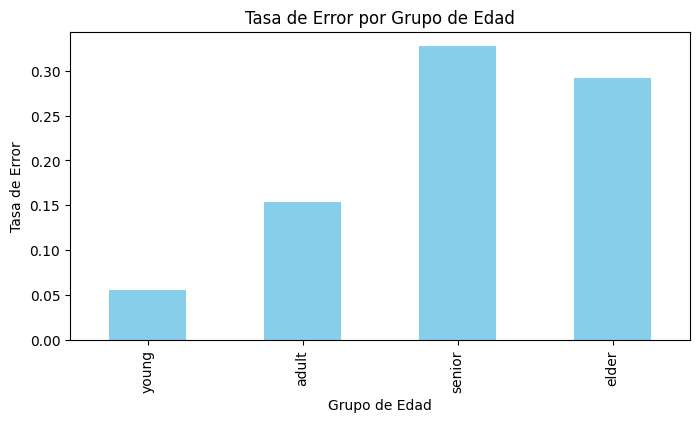

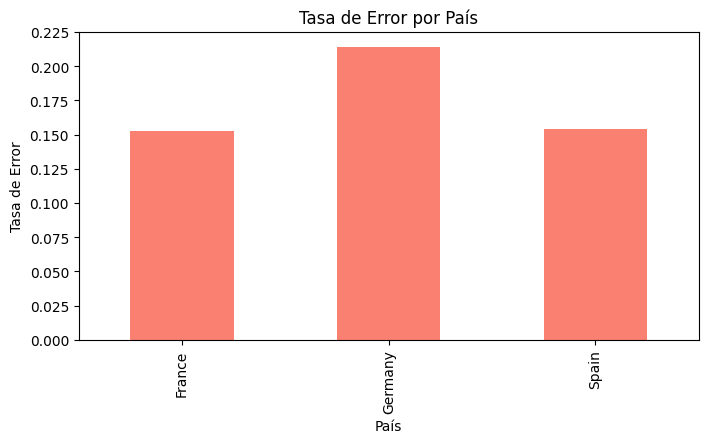

In [ ]:

# ---------------------------------------------------
# Paso 1: Definición de variables y separación del dataset
# ---------------------------------------------------
numeric_features = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']
categorical_features = ['country', 'gender']
target = 'churn'
X = df[numeric_features + categorical_features]
y = df[target]

# División en entrenamiento y prueba manteniendo la proporción de clases
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ---------------------------------------------------
# Paso 2: Definición del preprocesador
# ---------------------------------------------------
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# ---------------------------------------------------
# Paso 3: Construcción de modelos base en pipelines
# ---------------------------------------------------
# Pipeline para Random Forest (optimizado previamente)
pipeline_rf = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(
         n_estimators=300,
         max_depth=10,
         max_features='sqrt',
         min_samples_split=10,
         min_samples_leaf=2,
         random_state=42,
         class_weight='balanced'
    ))
])
pipeline_rf.fit(X_train, y_train)

# Pipeline para XGBoost sin early stopping (para utilizar en el ensemble)
pipeline_xgb = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', XGBClassifier(
         n_estimators=300,
         max_depth=5,
         learning_rate=0.01,
         subsample=0.8,
         colsample_bytree=0.8,
         random_state=42,
         use_label_encoder=False,
         eval_metric='logloss'
    ))
])
pipeline_xgb.fit(X_train, y_train)

# ---------------------------------------------------
# Paso 4: Construcción del Stacking Ensemble (sin passthrough)
# ---------------------------------------------------
# Se quita el passthrough para que el meta-modelo reciba solo las predicciones de los modelos base
stacking_model = StackingClassifier(
    estimators=[
        ('rf', pipeline_rf),
        ('xgb', pipeline_xgb)
    ],
    final_estimator=LogisticRegression(random_state=42),
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    passthrough=False
)

stacking_model.fit(X_train, y_train)
y_pred_stack = stacking_model.predict(X_test)
y_probs_stack = stacking_model.predict_proba(X_test)[:, 1]

print("=== Desempeño del Stacking Ensemble (umbral = 0.5) ===")
print(classification_report(y_test, y_pred_stack))
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred_stack))
print("AUC-ROC:", roc_auc_score(y_test, y_probs_stack))
print("Brier Score:", brier_score_loss(y_test, y_probs_stack))

# Reoptimización del umbral para el ensemble usando la curva Precision-Recall
precisions_stack, recalls_stack, thresholds_stack = precision_recall_curve(y_test, y_probs_stack)
f1_scores_stack = [f1_score(y_test, (y_probs_stack >= thr).astype(int)) for thr in thresholds_stack]
optimal_threshold_stack = thresholds_stack[np.argmax(f1_scores_stack)]
max_f1_stack = max(f1_scores_stack)
print("\nNuevo umbral óptimo para el Stacking Ensemble:", optimal_threshold_stack)
print("Nuevo F1-score óptimo para el Ensemble:", max_f1_stack)

y_pred_stack_opt = (y_probs_stack >= optimal_threshold_stack).astype(int)
print("\n=== Evaluación Final del Stacking Ensemble (umbral = {:.2f}) ===".format(optimal_threshold_stack))
print(classification_report(y_test, y_pred_stack_opt))
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred_stack_opt))
print("AUC-ROC:", roc_auc_score(y_test, y_probs_stack))
print("Brier Score:", brier_score_loss(y_test, y_probs_stack))

# ---------------------------------------------------
# Paso 5: Análisis de Error para identificar subgrupos de mejora
# ---------------------------------------------------
# Se crea un DataFrame con los resultados de las predicciones del ensemble
results = X_test.copy()
results["true_churn"] = y_test.values
results["predicted_churn"] = y_pred_stack_opt
results["error"] = results["true_churn"] != results["predicted_churn"]

# Crear rangos de edad (agrupados en categorías)
results["age_group"] = pd.cut(results["age"],
                              bins=[0, 30, 45, 60, 100],
                              labels=["young", "adult", "senior", "elder"])

# Calcular la tasa de error por grupo de edad
error_rates_age = results.groupby("age_group")["error"].mean()
print("\nTasa de Error por Grupo de Edad:")
print(error_rates_age)

# Calcular la tasa de error por país
error_rates_country = results.groupby("country")["error"].mean()
print("\nTasa de Error por País:")
print(error_rates_country)

# Visualización de la tasa de error por grupo de edad
plt.figure(figsize=(8, 4))
error_rates_age.plot(kind='bar', color='skyblue')
plt.title("Tasa de Error por Grupo de Edad")
plt.ylabel("Tasa de Error")
plt.xlabel("Grupo de Edad")
plt.show()

# Visualización de la tasa de error por país (asumiendo pocas categorías)
plt.figure(figsize=(8, 4))
error_rates_country.plot(kind='bar', color='salmon')
plt.title("Tasa de Error por País")
plt.ylabel("Tasa de Error")
plt.xlabel("País")
plt.show()

## A continuación se presenta una interpretación y conclusión final sobre los resultados obtenidos tras aplicar las mejoras bonus (stacking ensemble y análisis de error), además de algunas recomendaciones para futuras iteraciones:


Interpretación de los Resultados
- Stacking Ensemble sin Passthrough:
- Desempeño Inicial (umbral = 0.5):
El ensemble obtuvo, al aplicar un umbral de 0.5, una exactitud de 85%, con un AUC-ROC cercano a 0.85. La matriz de confusión inicial mostró que la mayoría de las instancias se clasificaron correctamente, aunque la clase churn (la minoritaria) tuvo un F1-score de alrededor de 0.59, debido a una diferencia entre la precisión (69%) y el recall (52%).
- Reoptimización del Umbral:
Al calcular la curva Precision-Recall se identificó un umbral óptimo de aproximadamente 0.365, que se redondeó a 0.37 para la evaluación final. Con este umbral, el desempeño sobre la clase churn se ajustó: se observó una ligera disminución en la precisión (0.91 para la clase 0 y 0.58 para la clase 1) y un ligero aumento en el recall (0.88 y 0.64, respectivamente). Esto llevó a un F1-score para la clase churn de aproximadamente 0.61, manteniéndose la exactitud global en 83% y el AUC-ROC casi inalterado (≈0.85).
- Análisis de Error:
- Por Grupo de Edad:
Se encontró que los clientes más jóvenes ("young") tienen tasas de error muy bajas (alrededor del 5%), mientras que en los grupos "senior" y "elder" las tasas de error son considerablemente más altas (aproximadamente 32.7% y 29.2% respectivamente). Esto sugiere que el modelo tiene mayores dificultades para predecir correctamente el churn en clientes de mayor edad, lo cual podría requerir una revisión adicional en la ingeniería de características o un preprocesamiento específico para estos grupos.
- Por País:
Las tasas de error varían moderadamente entre países; en este caso, se observa que el modelo presenta una tasa de error mayor para clientes de Alemania (≈21.4%) y ligeramente menores para Francia (≈15.3%) y España (≈15.4%). Estas diferencias pueden servir para refinar el modelo integrando variables adicionales o segmentando el análisis por región.
- Warnings de XGBoost:
Los mensajes de advertencia acerca de use_label_encoder son informativos y se deben a que en versiones recientes de XGBoost dicho parámetro ya no es necesario. Esto no afecta el desempeño del modelo.
- FutureWarning en Pandas:
El mensaje relacionado con el parámetro observed en el groupby indica un cambio futuro en el valor predeterminado, por lo que se recomienda especificarlo si se desea mantener el comportamiento actual. Este aviso no afecta la validez del análisis, pero puede silenciarse configurando observed=False de forma explícita en el groupby.



## Conclusión Final
El sistema de predicción de churn desarrollado en este trabajo ha evolucionado a través de múltiples mejoras:


- Modelos Base y Optimización:
Se evaluaron y optimizaron distintos modelos (Regresión Logística, Random Forest y XGBoost), siendo los basados en árboles (Random Forest y XGBoost) los que mostraron un alto poder discriminativo (AUC-ROC aproximadamente 0.85).
- Mejoras Bonus – Ensamblado y Análisis de Error:
La implementación del stacking ensemble, que combina Random Forest y XGBoost (sin early stopping para la integración en el ensemble), permitió explorar la complementariedad de ambos modelos. Aunque los resultados del ensemble son similares a los obtenidos de forma individual con XGBoost, el enfoque de stacking amplía la robustez y abre la puerta a futuras optimizaciones (por ejemplo, mediante técnicas de stacking más avanzadas o agregando nuevos modelos base).
- Asimismo, el análisis de error segmentado por grupos de edad y país ha identificado subgrupos con mayor tasa de error, lo que constituye una oportunidad para personalizar el preprocesamiento y la ingeniería de características. Este análisis puede guiar el ajuste focalizado de modelos o tratamiento específico para los clientes mayores o aquellos de determinados países.
- Recomendaciones Futuras:
- Ensamblado Avanzado (Stacking): Investigar configuraciones con mayor cantidad de modelos base o meta-modelos más sofisticados (por ejemplo, ensamblados basados en stacking con validación en dos niveles) que puedan aprovechar mejor la diversidad de los datos.
- Early Stopping Adaptativo en XGBoost: Ajustar de forma adaptativa el early stopping en XGBoost para mejorar la generalización sin necesidad de quitarlo en el ensemble.
- Segmentación y Personalización: Profundizar en el análisis de error para diseñar estrategias específicas de preprocesamiento o ingeniería de características para subgrupos con alto error (por ejemplo, clientes senior y elder).
En resumen, el modelo stacking ensemble, junto con el análisis de error, brinda un panorama prometedor en la predicción de churn. Si bien el desempeño global es robusto, la integración de técnicas complejas de ensamblado y el afinamiento focalizado para subgrupos específicos representan la vía para futuras améliorations, haciendo de este sistema una herramienta cada vez más eficaz para apoyar estrategias de retención de clientes en entornos con datos desbalanceados.